<a href="https://colab.research.google.com/github/sabitendu/EDA-Capstone-Project-on-Play-Store-App-Review-Analysis/blob/main/playstore_app_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


1.   Which category have most number of app and least number of app?
2.   Which category has most number of average installation?
3.   Which category apps has highest average rating?
4.   Which category has most mixed type of rating?
5.   Which apps has most number of installation?
6.   What is ratio of free app and paid apps?
7.   Which category has most ratio of free and paid apps?
8.   What is rating distribution of free and paid apps?
9.   What is price distribution of paid apps?
10.  Find the top 5 paid app  has highest reveneu.
11.  What is size distribution of each category?
12.  What is the size distribution of free app and paid apps?
13.  Does no of reviews has any impact on rating of the app?
14.  Does no of reviews has any impact on no of installation?
15.  Which content rating has most no of apps?
16.  Which content rating has most no of average installation?
17.  What is ratio of free app and paid app on each content rating?
18.  What is the count of the apps belong to the each Genre?
19.  What is effect of Android version in no of installation?
20.  What is the effect of current version in rating of the app?
21.  What is effect of current verion in no. of review of the apps?
22.  What is the distribution of update over the year?
23.  What is the distribution of the update of free app and paid app over 6 month?
24.  What is the impact of last update on rating?
25.  What is the sentiment distibution of the apps?
26.  What is the distribution of the sentiment polarity?
27.  What is the relation between sentiment subjectivity and sentiment polarity?
28.  What is most frequent words Top rated apps and below average rated word?
29.  What is corelation between the variables of the apps?
30.  How are the relation between the most corelated variable?
  















#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Explore the playstore data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
%matplotlib inline

### Load the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
ps_data_path='/content/drive/MyDrive/Alma Better/Python For Data Science/Capstone_Project/Play Store Data.csv'
df_ps=pd.read_csv(ps_data_path)

### Dataset First View

In [4]:
# Dataset First Look
#let's watch the first four row
df_ps.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


In [5]:
#let's look to the last four rows
df_ps.tail(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df_ps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
#find no of rows and columns in the dataset
rows=df_ps.shape[0]
column=df_ps.shape[1]
print(f"no of rows is {rows} and no of columns is {column}")

no of rows is 10841 and no of columns is 13


### Dataset Information

In [8]:
# Dataset concise summary
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


 **From above we can observe two major facts and they are**


1.   **out of 13 columns 1 column is numerical rest are in categorical value**

2.   **There are few null data present in the dataset,we will inspect them later.** 







#### Duplicate Values

In [9]:
# find the duplicate dataframe according to the app column
duplicate=df_ps[df_ps.duplicated(subset='App')]
duplicate.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up


In [10]:
#find the count of the duplicate data in the dataset
rows_duplicate=duplicate.shape[0]
print(f"no of duplicate data is {rows_duplicate} is the dataset")

no of duplicate data is 1181 is the dataset


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df_ps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

It's look like only 5 columns has  missing data

**1.Rating column** 

**2.Current Ver**

**3.Android Ver**

**4.Type**

**5.Content Rating**

<Axes: >

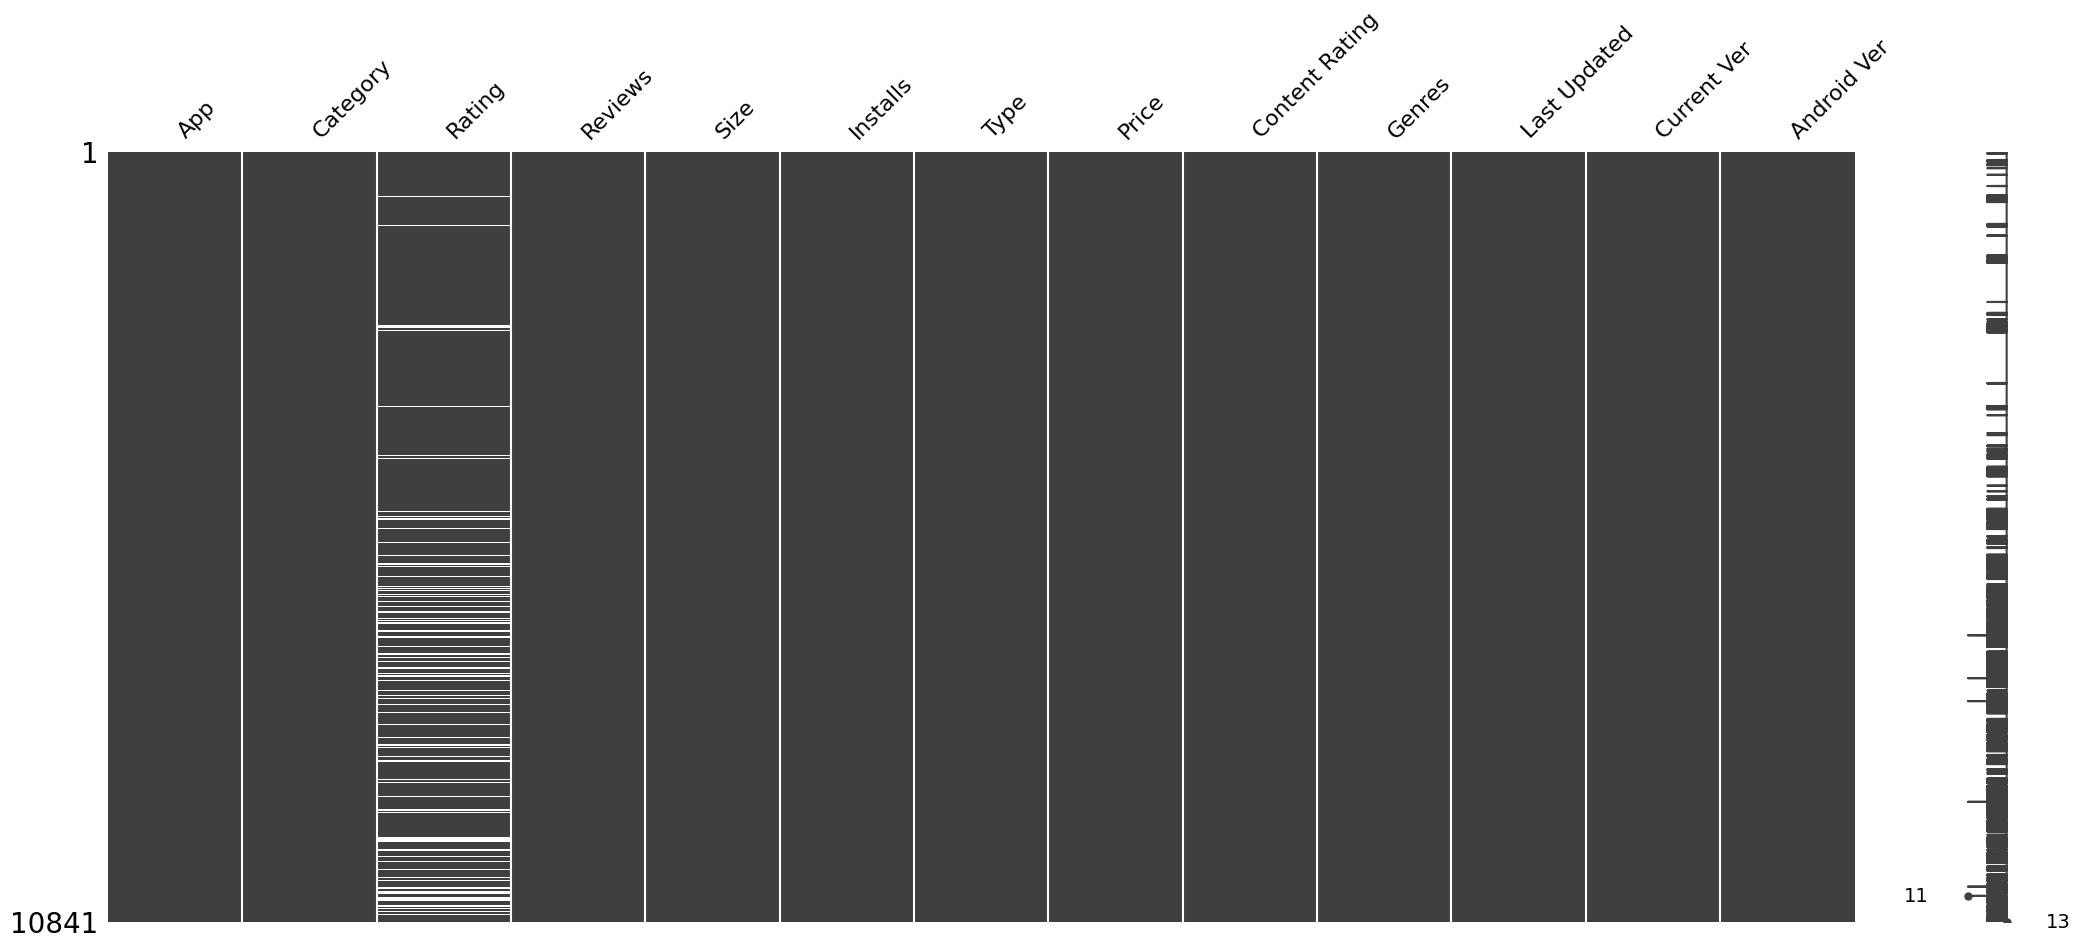

In [12]:
# Visualizing the missing values
msno.matrix(df_ps)

From the above matrix plot we can see that the missing value of Rating column are located all over the place,current_ver column's missing value located near the ending part of the column and other column's missing value are not observable respective of amount of the data.

### What did you know about your dataset?

**Let us first define what information the columns contain based on our inspection.**

play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:



*   **App** - It tells us about the name of the application.
*   **Category** - It gives the category to the app,like educational,sports,games etc.

*   **Rating** - It contains the average rating of the respective app received from its users.
*   **Reviews** - It shows us about the total number of users who have given a review for the application.

*   **Size** - It tells us about the size being occupied by the application on the mobile phone.

*  **Installs** - It tells us about the total number of installs/downloads for the application.
*   **Type** - It states whether an app is free to use or paid.

*  **Price** - It states the price payable to install the app. For free type apps, the price is zero.

*  **Content Rating** - It states whether or not an app is suitable for all age groups or not.

*   **Genres** - It tells us about the various other categories to which an application can belong.
*  **Last Updated** - It tells us about the when the application was updated.

*  **Current Ver** - It tells us about the current version of the application.

*  **Android Ver** - It tells us about the android version which can support the application on its platform.
























## ***2. Understanding Your Variables***

In this dataset the primary column is app as it stated the particular app name which should be unique in dataset.After that most important column would be Category,Reviews,Rating.

In [13]:
# Dataset Columns
df_ps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [14]:
# view the basic statistical details
df_ps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


only rating column is numerical others are categorical data

### Variables Description 

only rating column is numerical others are categorical data.Here we can see that maximum of Rating column is 19. This is inappropriate as Rating is given out of 5. So the data is corrupted here.Minimum rating given is 1.0.Because of the corrupted data present in the dataset we can not conclude any statistical description.

In [15]:
#let's look at the number of corrupted data in the Rating column
df_ps[(df_ps['Rating']>5.0) | (df_ps['Rating']<1.0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


So in Rating column there is only 1 corrupted data and for same App there is also have null value for Content Rating. we can drop this row 

In [16]:
df_ps.drop(index=10472,inplace=True)
df_ps.shape

(10840, 13)

In [17]:
df_ps.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


Here we can see that maximum Rating belong between 4.0 and 4.5 and mean of the rating around 4.2

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
df_ps.nunique()

App               9659
Category            33
Rating              39
Reviews           6001
Size               461
Installs            21
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1377
Current Ver       2831
Android Ver         33
dtype: int64

In this dataset 

*   **There are 9659 apps are present,it is the primary key of this dataset**
*   **There are 33 categories in the dataset,i.e-games,family,medical**
*   **2 types are free and paid**
*   **6 type of content rating**
*   **118 different genres**
*   **33 diffrent android version**



# 3. ***Data Wrangling***

3.1 Drop the Duplicate value

In [19]:
#drop the duplicate values based on app column
df_ps.drop_duplicates(subset='App',keep='first',inplace=True)
#check the no of rows in the dataset after dropping the dataset
df_ps.shape


(9659, 13)

### 3.1 Dealing with the missing value

In [20]:
#let's understand the missing with more detailis.Here we gonna create a function which will tells us in detalis about missing data
def missingdata_info(df):
  '''
  This function is helps to find the missing data in details 
  '''
  missing_df=pd.DataFrame(index=df.columns)
  missing_df['datatypes']=df.dtypes
  missing_df['total no of value']=[len(df)]*len(missing_df)
  missing_df['not null value']=df.count()
  missing_df['null values']=df.isna().sum()
  missing_df['percentage  of null value']=(missing_df['null values']/len(df))*100
  ms_df=missing_df[missing_df['null values']>0]
  return ms_df

In [21]:
missingdata_info(df_ps)

,datatypes,total no of value,not null value,null values,percentage of null value
Rating,float64,9659,8196,1463,15.146495
Type,object,9659,9658,1,0.010353
Current Ver,object,9659,9651,8,0.082824
Android Ver,object,9659,9657,2,0.020706


*   **Near about 15 percent of the data in rating columns are missing and it is near about 1463 column**
*  **Rests of the missing column type,content rating current ver and ver is fewer missing columns and it is less than 1 percent**







###3.1.1 Dealing with Android Ver column

In [22]:
#check out the android ver missing rows
df_ps[df_ps['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [23]:
#finding the number of different value in Android Ver
df_ps['Android Ver'].value_counts()

4.1 and up            2202
4.0.3 and up          1395
4.0 and up            1285
Varies with device     990
4.4 and up             818
2.3 and up             616
5.0 and up             512
4.2 and up             372
2.3.3 and up           273
2.2 and up             239
3.0 and up             231
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

Here we can see that the Nan value of Android Ver is tough to replace,because android version has wide number of unqiue vales and widely spread to each unique value and there are only 3 rows and it is around 0.02 percent so we can eliminate it 

In [24]:
#drop the null value of the Android Ver column 
df_ps=df_ps[df_ps['Android Ver'].notnull()]
#check the shape of the dataframe after dropping missing Android ver column
df_ps.shape

(9657, 13)

###3.1.2 Dealing with Current Ver column

In [25]:
#check out the current ver missing rows
df_ps[df_ps['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [26]:
#finding the number of different value in Current Ver
df_ps['Current Ver'].value_counts()

Varies with device    1055
1.0                    799
1.1                    259
1.2                    176
2.0                    149
                      ... 
2.27.1                   1
1.6.11                   1
20180517                 1
3.1.00                   1
2.0.148.0                1
Name: Current Ver, Length: 2817, dtype: int64

Here we can see that the Nan value of Current Ver is tough to replace,because Current version has wide number of unqiue vales and widely spread to each unique value and there are only 8 rows and it is around 0.08 percent so we can eliminate it 

In [27]:
#Dropping the missing current ver data
df_ps=df_ps[df_ps['Current Ver'].notnull()]
#check out the shape of the dataframe  after dropping current ver missing data
df_ps.shape

(9649, 13)

###3.1.3 Dealing with type column

In [28]:
#finding the null value in Type column
df_ps[df_ps['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [29]:
#find the type column data  spread
df_ps['Type'].value_counts()

Free    8895
Paid     753
Name: Type, dtype: int64

**Here is only 2 unique Type in the dataset.if type is free the price would be 0 and if type is paid then price would not be 0. So we can replace the type with free**

In [30]:
#replace the Nan value of type column with free
df_ps['Type'].fillna('Free',inplace=True)

<ipython-input-30-6603e77775a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ps['Type'].fillna('Free',inplace=True)


###3.1.4 Dealing with the Rating column

In [31]:
#find out the missing rating data or rating is 0 in the dataset
df_ps[(df_ps['Rating'].isnull()) | (df_ps['Rating']==0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [32]:
#find out the rating rows whose value is more than 5
df_ps[(df_ps['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are lots of data is null value in the dataset.So we can not drop this data,we need to replace it.The datatype of the Rating is numerical. We need to observe the data distribution of this column.

<Axes: xlabel='Rating'>

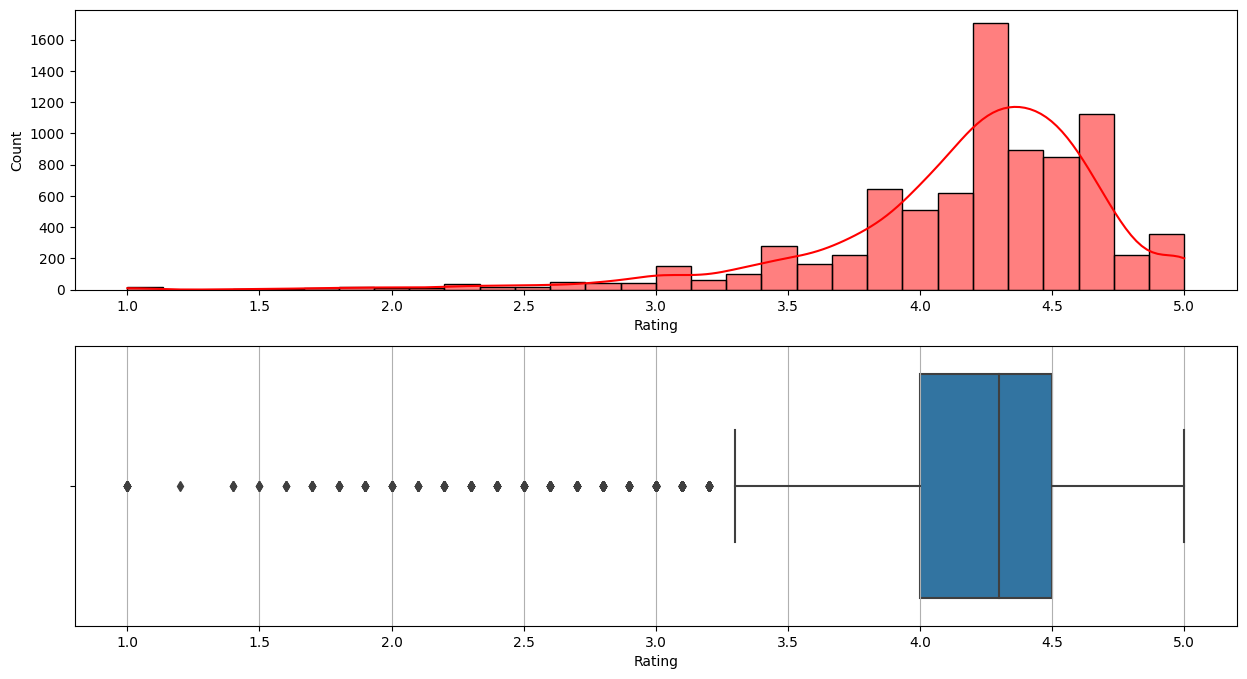

In [33]:
#try to understand the distribution of the data with histplot and boxplot
fig, ax = plt.subplots(2,1, figsize=(15,8))
plt.grid()
sns.histplot(df_ps['Rating'], color ='red', bins = 30,kde=True,ax=ax[0])
sns.boxplot(x=df_ps['Rating'],data=df_ps,ax=ax[1])


From the above figure we can see that distribution is right skewed.So replace the null value with mean value may be inapropriate because of outlier is present in left side of data.

In [34]:
#find the mean,median and mode value of the rating column
mean_value=round(df_ps[~df_ps['Rating'].isnull()].Rating.mean(),1)
median_value=df_ps[~df_ps['Rating'].isnull()].Rating.median()
mode_value=df_ps['Rating'].mode()
print(f"The mean value is {mean_value}, median value is {median_value} and mode value is {mode_value}")

The mean value is 4.2, median value is 4.3 and mode value is 0    4.3
Name: Rating, dtype: float64


So here median value and mode value is same,so we will replace the null values with median value

In [35]:
#replace the Nan value of Rating column with median value
df_ps['Rating'].fillna(median_value,inplace=True)

In [36]:
#check once again if there is null value
df_ps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

###3.2 Reshaping the data

**For the data analysis Reviews,Size,Price,Installs should be in numeric value.So these columns need to convert them into numeric value.Last Updated column should be in datetime format** 

### 3.2.1 Change the datatype of Review column

In [37]:
#changing the review datatype from object to integer
df_ps['Reviews']=df_ps['Reviews'].astype(int)
#check the datatype of the column after change 
df_ps['Reviews'].dtype

dtype('int64')

### 3.2.2 Change the datatype of Size column

In [38]:
#look at the format of the data of size column
df_ps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

**Here M denontes the size in MB(MegaByte) and k denotes as kB(kiloByte).Before converting the data, unit of the size should be unique and 'k' and 'M' should be omitted.**

In [39]:
# create a function to convert the data into numerical and unit of MB
def size_convert(app_size):
  '''
  This is the function to convert the size into kb to mb
  '''
  try:
    if app_size[-1]=='M':
      return float(app_size[:-1])
    elif app_size[-1]=='k':
      return round((float(app_size[:-1])/1024),2)
    else:
      return float(app_size)
  except:
    return app_size

In [40]:
#convert the column as suggested
df_ps['Size']=df_ps['Size'].apply(lambda size:size_convert(size))
#check the datatype of the column after applying function on the column
df_ps['Size'].dtype

dtype('O')

**datatype is still object type because 'varies with device' size is present in the dataset.So it can't be convert the entire column to numerical.**

### 3.2.3 Dealing with Installs columns


In [41]:
#look at the format of the column
df_ps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

**In  Install column there is '+' and ',' which need to be filtered than convert to numeric**

In [42]:
#create a function to convert install coumn to numeric data
def install_to_numeric(column_data):
  '''
  This function is omit the + and , in the data and turn into numeric
  '''
  if '+'and ',' in column_data:
    data=int(column_data[:-1].replace(',',''))
    return data
  elif '+' in column_data:
    data=int(column_data[:-1])
    return data
  elif ',' in column_data:
    data=int(column_data.replace(',',''))
    return data
  else:
    return int(column_data)

In [43]:
#apply the function to convert install data into numeric
df_ps['Installs']=df_ps['Installs'].apply(lambda x:install_to_numeric(x))
df_ps.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


###3.2.4 Dealing the Price Column
Price column need to convert in numerct data.There is '$' in the price data.we need to eliniminate it.

In [44]:
def price_to_numeric(price):
  '''
  This function is to convert price column datatype into numeric
  '''
  if '$' in price:
    new_price=float(price.replace('$',''))
    return new_price
  else:
    return float(price)

In [45]:
# apply the function into  price column
df_ps['Price']=df_ps['Price'].apply(lambda x:price_to_numeric(x))
#check the price column of the data which have non zero price
df_ps[df_ps['Price']!=0].head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up


### 3.2.5 Dealing with Last Updated Column
Last Updated column need to be convert into datetime format

In [46]:
# Pandas to_datetime() function applied to the values in the last updated column
df_ps['Last Updated']=pd.to_datetime(df_ps['Last Updated'])
#check the dataframe after converting to datetime
df_ps.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up


#### User Review Data load and Data preparation for Analysis

In [47]:
#load the user review dataset
ur_path='/content/drive/MyDrive/Alma Better/Python For Data Science/Capstone_Project/User Reviews.csv'
df_ur=pd.read_csv(ur_path)
df_ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [48]:
#user review dataset information
df_ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB



*   There are only 5 colums

*   **2 columns are numrical and they are sentiment polarity and sentiment subjectivity**

*   **3 column are having categorical value and they are app.translated review,sentiment**
*   **There are lots of null value present in the  dataset.we need to inspect the dataset about this.**



In [49]:
# view the basic statistical details
df_ur.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### User Review dataset information
user_reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:

* **App:** Contains the name of the app with a short description (optional).
* **Translated_Review:** It contains the English translation of the review dropped by the user of the app.
* **Sentiment:** It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
* **Sentiment_Polarity:** It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.
* **Sentiment_Subjectivity:** This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.

In [50]:
#columns of the data set
print(df_ur.columns)
rows=df_ur.shape[0]
cols=df_ur.shape[1]
print(f"The user review data set has {rows} rows and {cols} columns")

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
The user review data set has 64295 rows and 5 columns


## Data Cleaning and Preparation


In [51]:
# Understand the missing data in details
missingdata_info(df_ur)


,datatypes,total no of value,not null value,null values,percentage of null value
Translated_Review,object,64295,37427,26868,41.788631
Sentiment,object,64295,37432,26863,41.780854
Sentiment_Polarity,float64,64295,37432,26863,41.780854
Sentiment_Subjectivity,float64,64295,37432,26863,41.780854




*   We can see that around 42 percent are missing value in all columns
* **Translated_Review** has 26868 null values which contributes **41.79%** of the data.
* **Sentiment** has 26863 null values which contributes **41.78%** of the data.
* **Sentiment_Polarity**  has 26863 null values which contributes **41.78%** of the data.
* **Sentiment_Subjectivity** has 26863 null values which contributes **41.78%** of the data.

In [52]:
#find out where all the column has null value
df_na=df_ur[df_ur['Translated_Review'].isna() & df_ur['Sentiment'].isna() & df_ur['Sentiment_Polarity'].isna() & df_ur['Sentiment_Subjectivity'].isna()]
df_na.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN


In [53]:
print(len(df_na))

26863




*   26863 rows have all null valus.
*   This rows need to be dropped



In [54]:
#drop the rows which have all null value using isin function
cond = df_ur['Sentiment'].isin(df_na['Sentiment'])
cond


0        False
1        False
2         True
3        False
4        False
         ...  
64290     True
64291     True
64292     True
64293     True
64294     True
Name: Sentiment, Length: 64295, dtype: bool

In [55]:
df_ur.drop(df_ur[cond].index, inplace = True)

In [56]:
df_ur.shape

(37432, 5)

In [57]:
df_ur.isna().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Now only Translated Review has 5 null values

In [58]:
#check the rows which have null values of translated review
df_ur[df_ur['Translated_Review'].isna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [59]:
#check the unique values of translated review
df_ur['Translated_Review'].unique()

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'This help eating healthy exercise regular basis',
       'Works great especially going grocery store', ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

There seems to error the remaining non null values of Translated Reviews.This is because the Sentiment, sentiment ploarity and sentiment subjectivity of the review can be determined if and only if there is a corresponding review.

So we need to drop it too

In [60]:
#drop the null values
df_ur.dropna(inplace=True)
df_ur.shape

(37427, 5)

### Merge the two Dataframe

In [63]:
#merge two dataframe by inner join
merged_df=pd.merge(df_ps,df_ur,on='App',how='inner')
merged_df.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


Now we have total 3 dataframe for analysis


### What all manipulations have you done and insights you found?

*   **Dropped the null values of Type,Android ver and Current ver columns** 

*   **Replaced the null values of Rating column with median value**


*  **Changed datatype of Review,Installs,Price to int value**

*  **Changed the datatype of Size column to int except the varies with device**

*   **Changed the datatype of Last Updated column to datetime format**

*   **Dropped all null values of Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity**

*   **Merged the playstore data and user review data with inner join**

*   **Data pipeline has developed sucessfully.Now dataflow can be examined and visuals can be created.It is easy to compare different measures using the visualizations, and thus to draw implications from them.**



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###4.1 Univariate Analysis
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words our data has only one variable.It’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

#### 1)**Which category have most number of app and least number of app?**

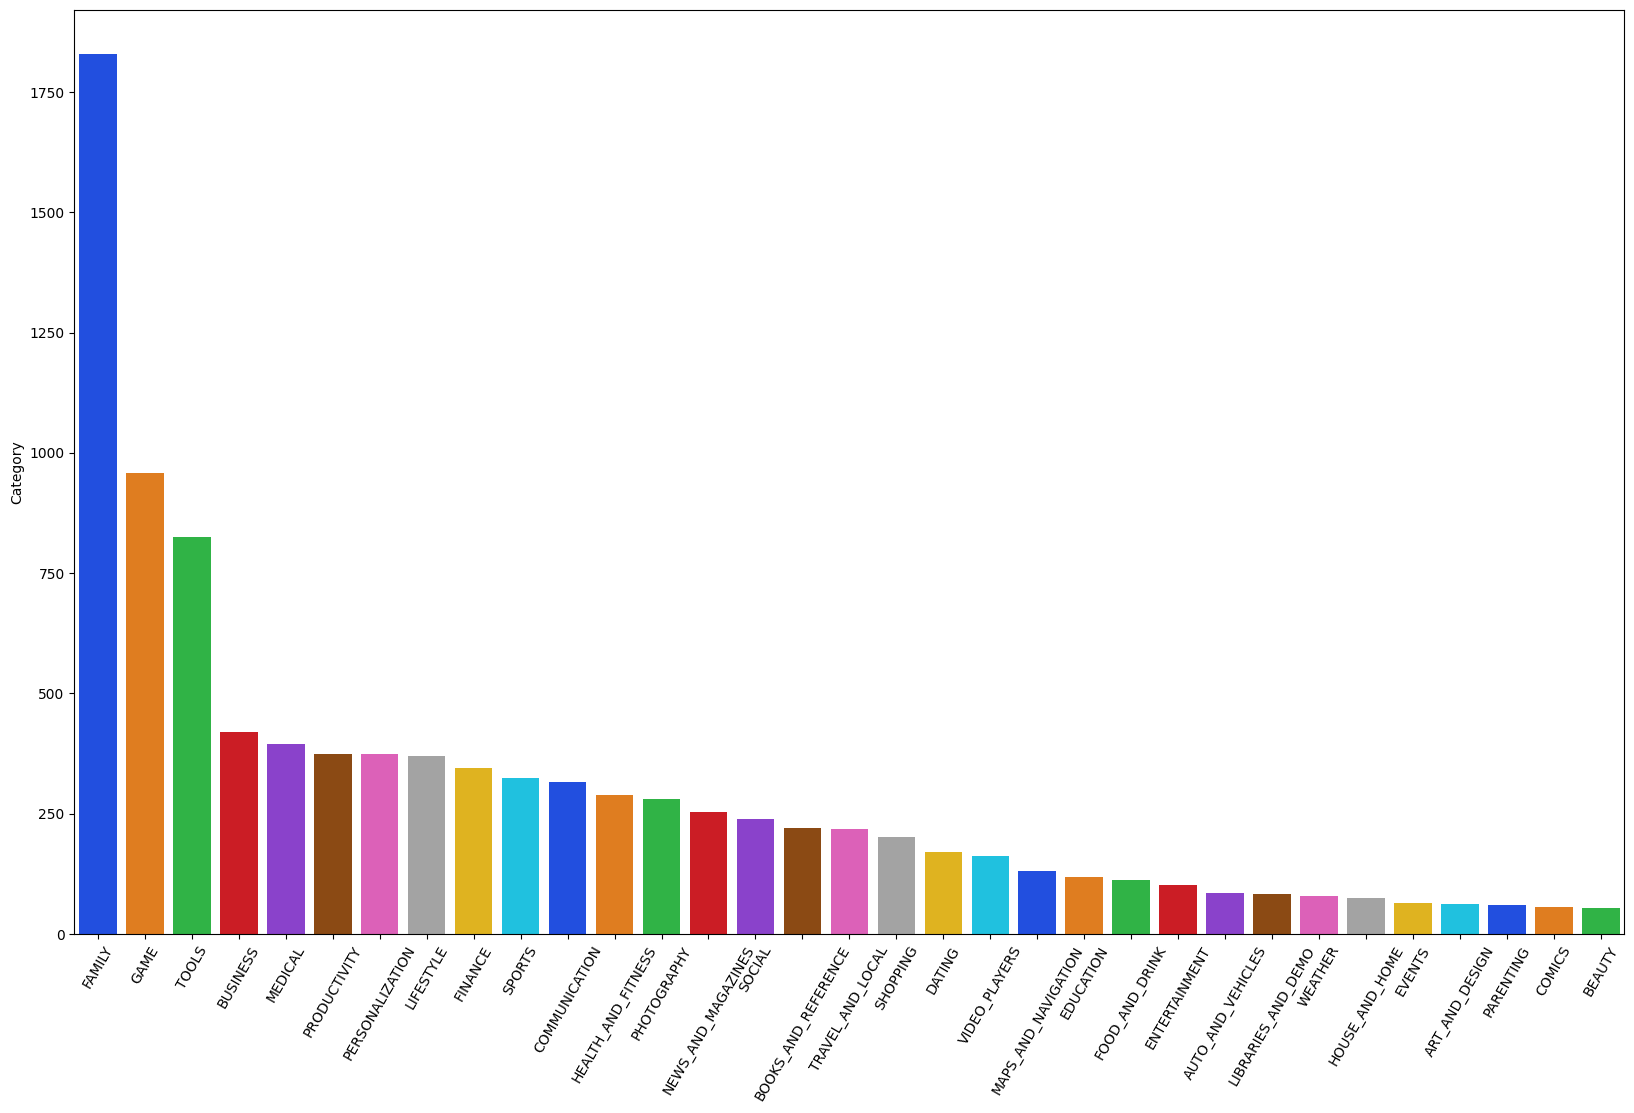

In [76]:
#Visualisation of No of app based on each category 
fig,ax=plt.subplots(figsize=(20,12))
cat_app=df_ps['Category'].value_counts()
cat_app_vis=sns.barplot(x=cat_app.index,y=cat_app,palette="bright")
plt.xticks(rotation=60)
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots are used here to compare the frequency or count of the categorical data.Here we have used to compare the count of the categorical data.

##### 2. What is/are the insight(s) found from the chart?

From this plot we can get the most  and least category of app in the playstore.we can see the art and design type of the app has  highest presence and it is abpve 1750.  Maps and navigation type of the column has lowest presence in the playstore and it is below 250.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If we want to launch a new app  then first question will be in what  category app we should launch in market.This analysis can give the answer.From the visuals we can say that, if we want to avoid high compettion it will be best to avoid art and design,auto and vechicles and beuty type and best will be parenting,weather,video player news and magazines and maps and navigation.

###2)**Which category has most number of average installation?**

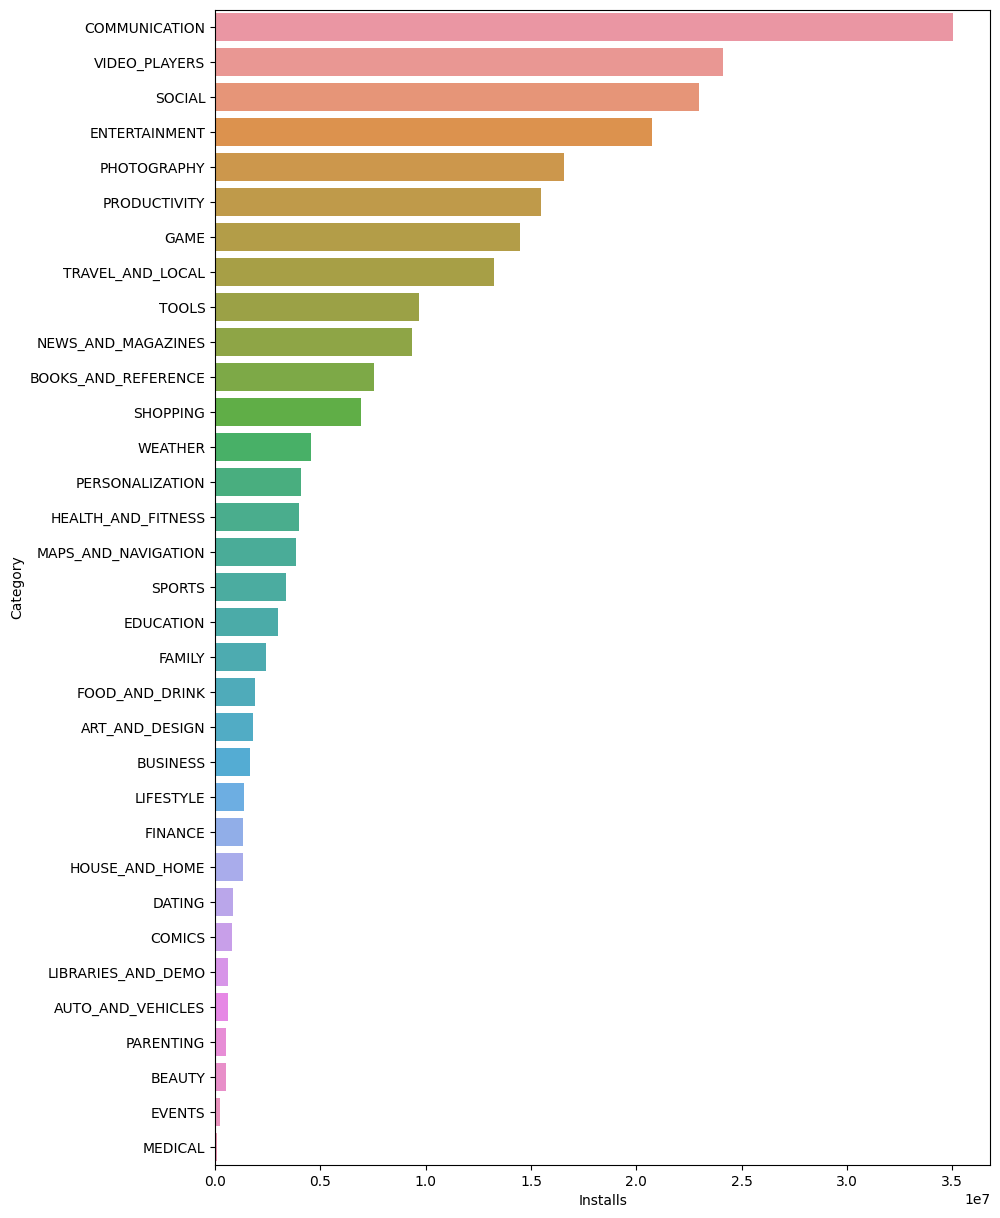

In [77]:
cg_ins= df_ps.groupby(['Category'])['Installs'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10,15))
sns.barplot(x=cg_ins,y=cg_ins.index,data=df_ps)
plt.show()

##### 1. Why did you pick the specific chart?

We are finding which category  app has maximum installation and which app has minimum installation.Here category is categorical data and and Total no of installation is numerical data.Bar chart is most common for such conditions 

##### 2. What is/are the insight(s) found from the chart?

Communication,video Players,Social,Entertainment,and Photography Category app are top 5 installed apps and ,,Parenting,Medical,Events,Beuty,Parenting and Auto Veichles Category has least 5 installed apps.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Among Playstore app users communication,video players Social category are most popular.So if our new launch will be in those category then it will be less risky but if  our are in events,medical,beauty category then we have to more cautious.

###3)**Which apps has most number of installation?**

In [ ]:
max_app=len(df_ps[df_ps['Installs']==df_ps.Installs.max()])
max_app

20

In [ ]:
list(df_ps[df_ps['Installs']==df_ps.Installs.max()].App)

['Google Play Books',
 'Messenger – Text and Video Chat for Free',
 'WhatsApp Messenger',
 'Google Chrome: Fast & Secure',
 'Gmail',
 'Hangouts',
 'Skype - free IM & video calls',
 'Google Play Games',
 'Subway Surfers',
 'Facebook',
 'Instagram',
 'Google+',
 'Google Photos',
 'Maps - Navigate & Explore',
 'Google Street View',
 'Google',
 'Google Drive',
 'YouTube',
 'Google Play Movies & TV',
 'Google News']

[Text(0, 0, 'Google News'),
 Text(1, 0, 'Maps - Navigate & Explore'),
 Text(2, 0, 'Google Street View'),
 Text(3, 0, 'YouTube'),
 Text(4, 0, 'Google Play Movies & TV'),
 Text(5, 0, 'Google+'),
 Text(6, 0, 'Instagram'),
 Text(7, 0, 'Facebook'),
 Text(8, 0, 'Google'),
 Text(9, 0, 'Google Play Books'),
 Text(10, 0, 'Hangouts'),
 Text(11, 0, 'Google Drive'),
 Text(12, 0, 'Skype - free IM & video calls'),
 Text(13, 0, 'Google Photos'),
 Text(14, 0, 'Messenger – Text and Video Chat for Free'),
 Text(15, 0, 'WhatsApp Messenger'),
 Text(16, 0, 'Google Chrome: Fast & Secure'),
 Text(17, 0, 'Subway Surfers'),
 Text(18, 0, 'Gmail'),
 Text(19, 0, 'Google Play Games')]

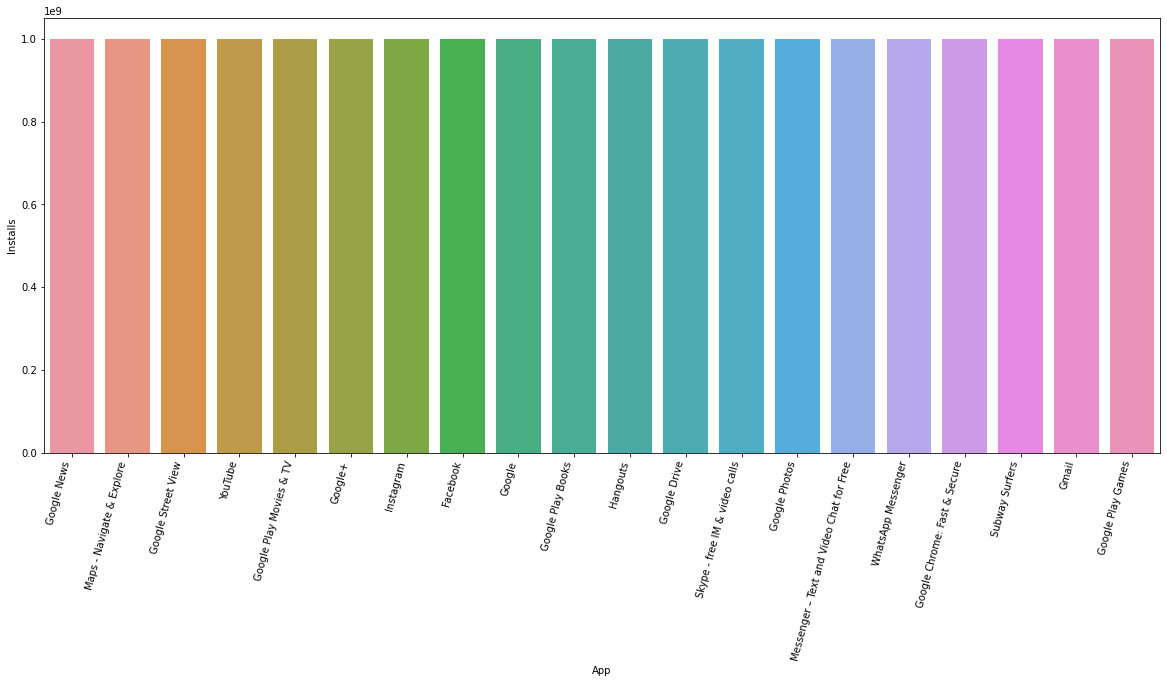

In [ ]:
# Chart - 8 visualization code
top_app=df_ps.sort_values('Installs',ascending=False).head(max_app)
fig,ax=plt.subplots(figsize=(20,8))
top_visual=sns.barplot(x=top_app.App,y=top_app.Installs)
top_visual.set_xticklabels(top_visual.get_xticklabels(), rotation= 75, horizontalalignment='right')

##### 1. Why did you pick the specific chart?

we want to know the highest installed apps in playstore.Here it goes categorical data vs numerical value,bar chart is ideal for this

##### 2. What is/are the insight(s) found from the chart?

Top 20 installed apps are Google Play Books,Messenger – Text and Video Chat for Free, WhatsApp Messenger, Google Chrome: Fast & Secure,
Gmail, Hangouts, Skype - free IM & video calls, Google Play Games,
Subway Surfers, Facebook, Instagram, Google+, Google Photos, Maps - Navigate & Explore, Google Street View, Google, Google Drive, YouTube,
Google Play Movies & TV, Google News.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If we want to launch new app,reach of the new app should be similar to above listed apps.So,then these 20 apps should be inspect separately.

### **4)What is ratio of free app and paid apps?**

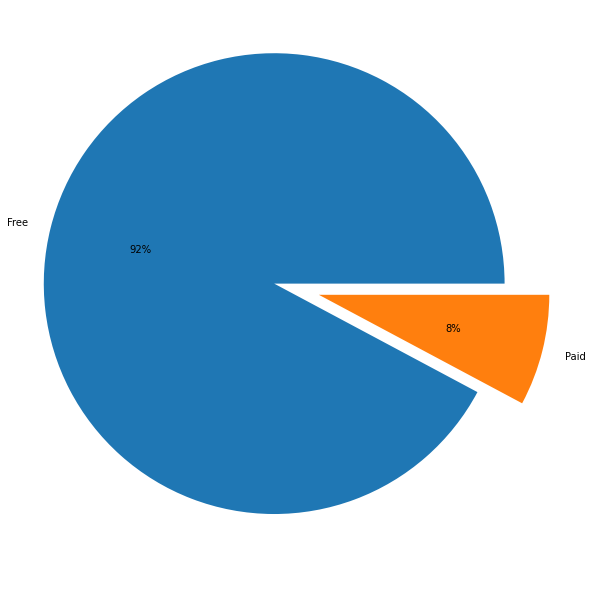

In [ ]:
# Chart - 2 visualization code
fig=plt.figure(figsize=(10,8))
ax=fig.add_axes([0,0,1,1])
data=df_ps['Type'].value_counts()
label=data.index
my_explode=[0.2,0]
ax.pie(data,labels=label,explode=my_explode,autopct='%1.0f%%')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are mainly used to comprehend how a data group is broken down into smaller pieces. The whole pie represents 100 percent, and the slices denote the relative size of that particular category.Here we want to rpresent types of the app as the part of whole

##### 2. What is/are the insight(s) found from the chart?

Maximum of of apps in playstore are free,only few portion of the apps are paid.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

For launching new app with free type will be less risky,because only few apps are paid.

### **5)Which category has most ratio of free and paid apps?**

<AxesSubplot:xlabel='Category'>

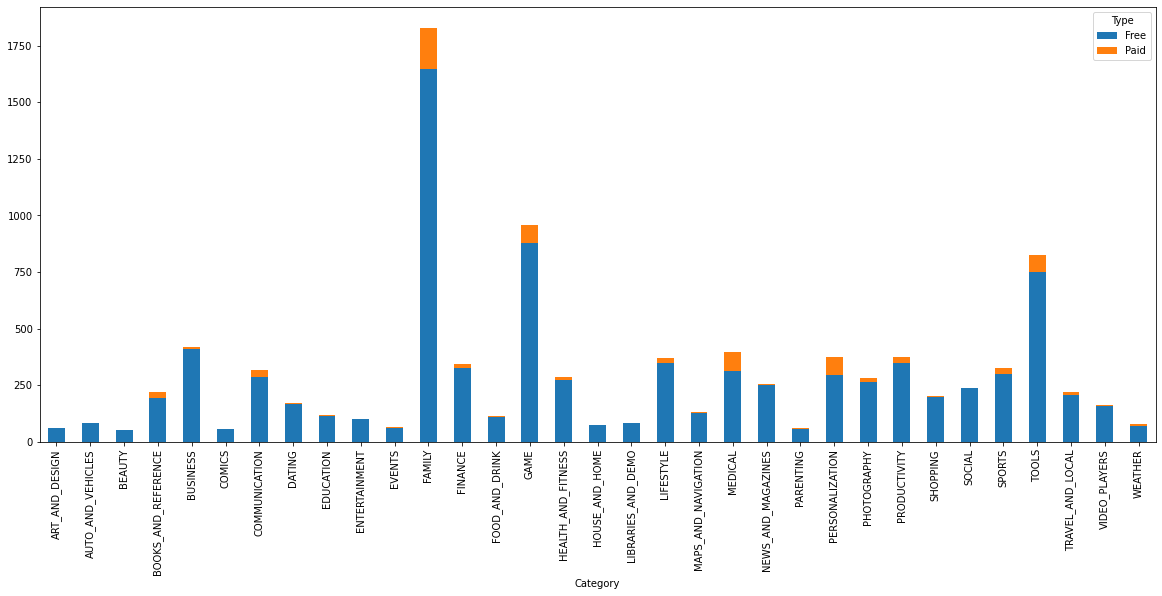

In [ ]:
# Chart - 7 visualization code
type_cat=df_ps.groupby('Category')['Type'].value_counts().unstack()
type_cat.fillna(0,inplace=True)

type_cat.plot(kind='bar',stacked=True,figsize=(20,8))

##### 1. Why did you pick the specific chart?

We want see look into which category app has most paid app in percentange.Stacked bar chartrepresents the multiple set of data where height of each data is sum of the all sets present in the dataset

##### 2. What is/are the insight(s) found from the chart?

Free apps are dominatinating in each category.Most of category has no paid app.Among paid apps Family,Games,Personalization and Tools have most percencentage Paid Apps.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the analysis we can say that going for free app will be less risky.But if we go for paid app then should stick to Family,Games,Medical,Personalization and Tools category

###**6)What is price distribution of paid apps?**

In [ ]:
df_paid=df_ps[df_ps['Type']=='Paid']
df_paid.Price.describe()

count    753.000000
mean      14.096494
std       58.855019
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price'>

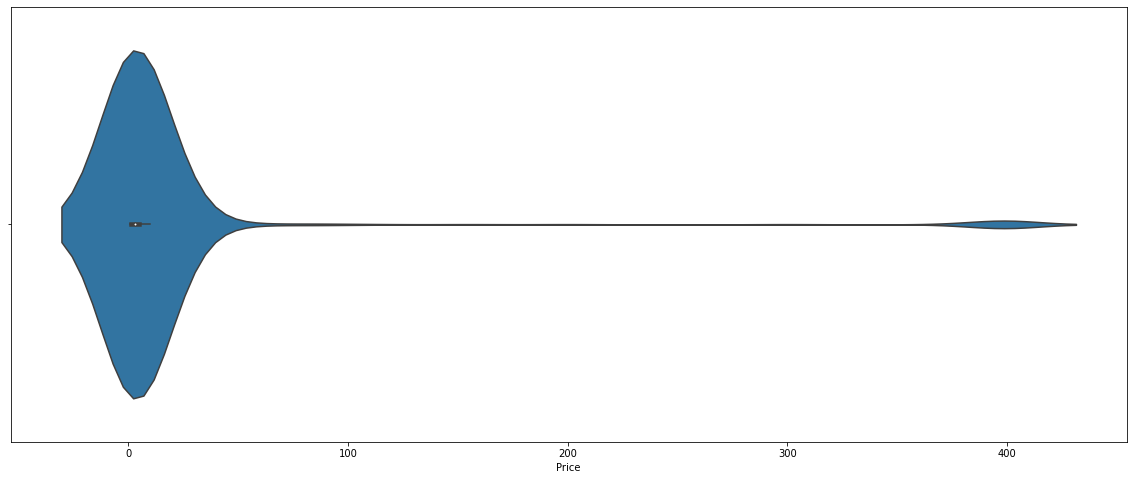

In [ ]:
# Chart - 4 visualization code
fig,ax=plt.subplots(figsize=(20,8))
sns.violinplot(x=df_paid.Price)

##### 1. Why did you pick the specific chart?

Violin chart can states the distribution of numerical data and it can help to find median,interquartile range,the lowe and upper adjacent so for understanding the price distribution violinplot is appropriate.

##### 2. What is/are the insight(s) found from the chart?

Maximum price of app belongs to 1.5 dollar to 5 dollar.Few app price also belongs to near about 400 dollar.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If our new app will be paid then it will help to set the price of installation 

###**7)Find the top 5 paid app according to revenue.**

In [ ]:
df_paid['Reveneau']=df_paid['Installs']*df_paid['Price']
df_paid.head()

<ipython-input-81-c350837f0b28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paid['Reveneau']=df_paid['Installs']*df_paid['Price']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reveneau
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,399000.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,39900.0
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,6990.0


<AxesSubplot:xlabel='App', ylabel='Reveneau'>

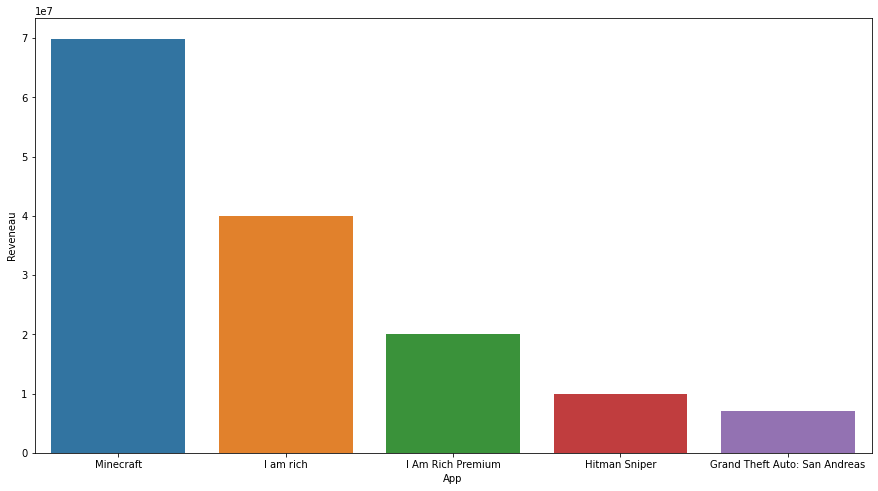

In [ ]:
paid_app=df_paid.sort_values(by='Reveneau',ascending=False).head()
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x=paid_app.App,y=paid_app.Reveneau)

##### 1. Why did you pick the specific chart?

Bar chart is appropriate for plot categorial data and numerical data.Here app names are categorical data and reveneau is numerical data

##### 2. What is/are the insight(s) found from the chart?

Top 5 earned app are Minecraft,I am rich,I am Rich Premium, Hitman Sniper, Grand Theft Auto:San Andreas

###**8)What is rating distribution of free and paid apps?**





In [ ]:
#create a group rating function
def app_rate(rating):
  '''
  This function helps to categorize the app rating
  '''
  if rating>=4.0:
    return 'Top Rated'
  elif rating>=3.0 and rating<4.0:
    return 'Above Average'
  elif rating>=2.0 and rating<3.0:
    return 'Average'
  else:
    return 'below average'

In [ ]:
#create a column in the dataframe and apply the function in the column
df_ps['Rating Group']=df_ps['Rating'].apply(lambda x:app_rate(x))
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Top Rated
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Above Average
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Top Rated
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Top Rated
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Top Rated


In [ ]:
type_rg=df_ps.groupby(['Type'])['Rating Group'].value_counts().unstack()
type_rg

Rating Group,Above Average,Average,Top Rated,below average
Type,,,,
Free,1535,207,7104,50
Paid,95,18,636,4


Text(0.5, 1.0, 'Rating distribution of paid apps')

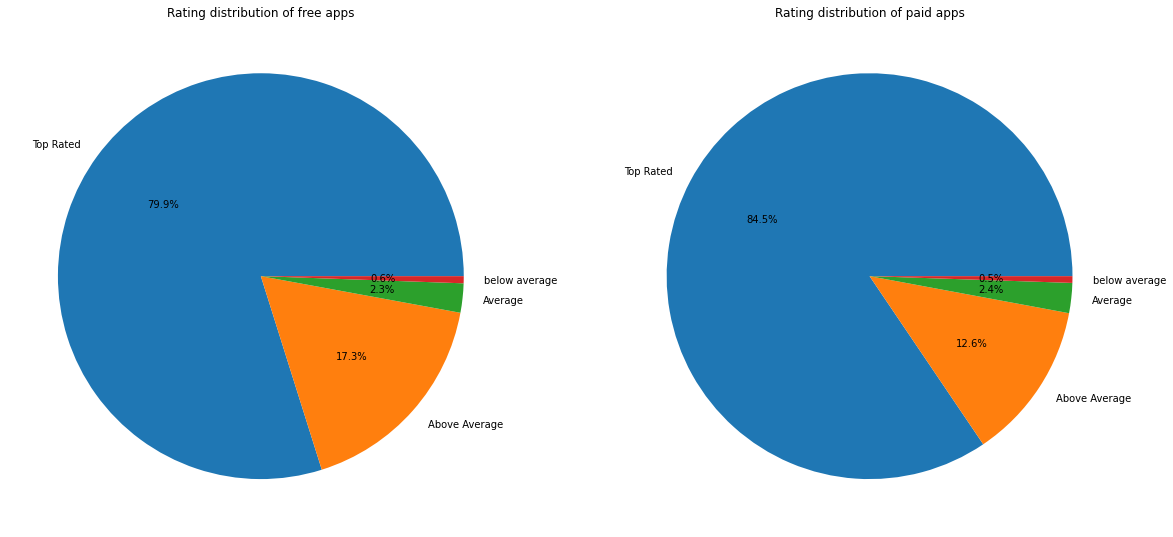

In [ ]:
paid_app=df_ps[df_ps['Type']=='Paid']
p_v=paid_app['Rating Group'].value_counts()
free_app=df_ps[df_ps['Type']=='Free']
f_v=free_app['Rating Group'].value_counts()
fig,ax=plt.subplots(1,2,figsize=(20,20))
ax[0].pie(x=f_v,labels=f_v.index,autopct='%1.1f%%')
ax[0].set_title('Rating distribution of free apps')
ax[1].pie(x=p_v,labels=p_v.index,autopct = '%1.1f%%')
ax[1].set_title('Rating distribution of paid apps')

##### 1. Why did you pick the specific chart?

We want to find the rating distribution of free app and paid app,means want to see the distribution of rating of as  part of whole data of each type,so pie chart is appropriate for this


##### 2. What is/are the insight(s) found from the chart?

Rating distribution of each type looks almost similar.Paid app has more percentage of Top rated app around 84 percent where as free app has around 80 percent.But above average category in  paid has 12.6 percent and free app has 17.3 percent.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

App type either free or paid it should be in Top rated for being in the compettion.For paid type app it should be in top rated category. 

##### 1. Why did you pick the specific chart?

For finding most mixed review and least mixed review there are mixed of categorical value and numerical value stacked barchart is most appropriate

##### 2. What is/are the insight(s) found from the chart?

Family category app maximum mixed variety group rating.Maximum app has two grouped rating category top rated and above average rated category.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

### **9)Does rating has any impact on installation?** 

In [ ]:
#statiscal describe of install column
df_ps['Installs'].describe()

count    9.649000e+03
mean     7.785404e+06
std      5.378557e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [ ]:
#box plot of rating group and installation
ins_rg=df_ps.groupby(['Rating Group'])['Installs'].mean()
ins_rg

Rating Group
Above Average    3.657586e+06
Average          1.131627e+05
Top Rated        8.931922e+06
below average    1.771250e+04
Name: Installs, dtype: float64

<AxesSubplot:xlabel='Rating Group', ylabel='Installs'>

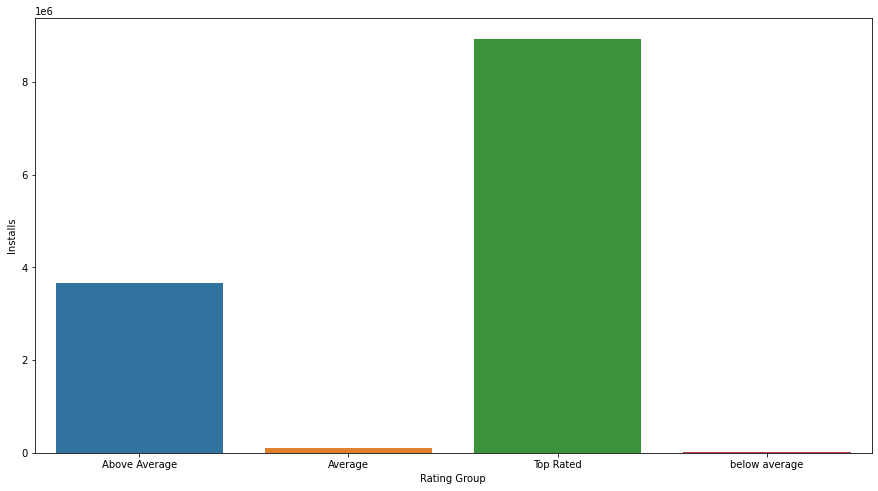

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x=ins_rg.index,y=ins_rg)



###1. Why did you pick the specific chart?

we are finding here relation between rating and no of installation.Here we have plot the average number of installation for each rating category.average installation is numerical data and rating group is categorical data,so bar chart has chosen.


##### 2. What is/are the insight(s) found from the chart?

We have find a direct relation between rating and no of installation.We can see that average installation of top rated app is maximum and follwing above average,average and below average.Higher the rating will follow high no of installation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

For getting large no of installation we should get higher rating from customers.

###**10)Which content rating has most no of apps?**

<Figure size 432x288 with 0 Axes>

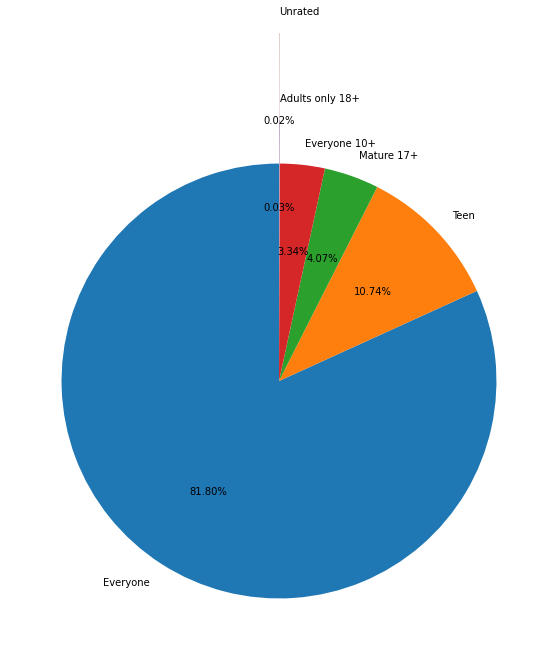

<Figure size 432x288 with 0 Axes>

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
con_rate=df_ps['Content Rating'].value_counts()

my_explode=[0,0,0,0,0.2,0.6]
ax.pie(con_rate,labels=con_rate.index,startangle=90,labeldistance=1.1,
       explode=my_explode,autopct='%2.2f%%')
plt.figure()

##### 1. Why did you pick the specific chart?

Here we want to represent content rating as part of the total no of apps,and pie charts are mainly used to comprehend how a data group is broken down into smaller pieces.so pie chart has chosen.

##### 2. What is/are the insight(s) found from the chart?

Most of the content rating is for everyone and it is around 82% of total apps.  Adults only 18+ content hast least no of app and it is around 0%.Teen rated are near about 11 percent,mature 17+ has around 4% and everyone 10+ content has around 3% of total apps.Compare to the others category of content rating for everyone is very large.Everyone content rating is domnating in content rating.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In for everyone content app there is high compettion as most number of app belongs to those category.

###**11)What is content rating distribution of free app and paid app?**

In [ ]:
#create the groupby dataframe of type and content rating
con_typ=df_ps.groupby(['Type'])['Content Rating'].value_counts()
con_typ.fillna(0,inplace=True)
con_typ

Type  Content Rating 
Free  Everyone           7241
      Teen                984
      Mature 17+          375
      Everyone 10+        291
      Adults only 18+       3
      Unrated               2
Paid  Everyone            652
      Teen                 52
      Everyone 10+         31
      Mature 17+           18
Name: Content Rating, dtype: int64

In [ ]:
con_typ['Free'].index

Index(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Adults only 18+',
       'Unrated'],
      dtype='object', name='Content Rating')

Text(0.5, -0.05, 'Content Rating distribution of paid apps')

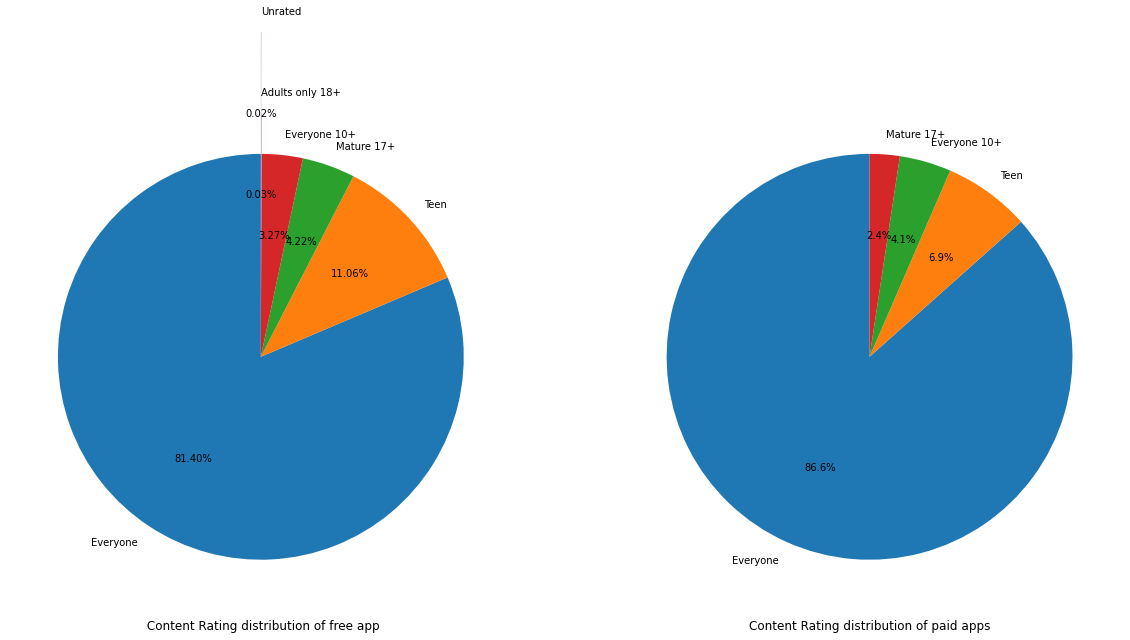

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,20))
my_explode=[0,0,0,0,0.2,0.6]
ax[0].pie(x=con_typ['Free'],labels=con_typ['Free'].index,autopct='%2.2f%%',startangle=90,explode=my_explode)
ax[0].set_title(' Content Rating distribution of free app',y=-0.05)
ax[1].pie(x=con_typ['Paid'],labels=con_typ['Paid'].index,autopct='%1.1f%%',startangle=90)
ax[1].set_title('Content Rating distribution of paid apps',y=-0.05)

#### Data visualisiation of Type column

####**12)Which content rating has most no of average installation?**

In [ ]:
#create groupby dataframe of content rating and no of installation
con_ins=df_ps.groupby(['Content Rating'])['Installs'].mean()
con_ins

Content Rating
Adults only 18+    6.666667e+05
Everyone           6.610639e+06
Everyone 10+       1.247289e+07
Mature 17+         6.203529e+06
Teen               1.591436e+07
Unrated            2.525000e+04
Name: Installs, dtype: float64

<AxesSubplot:xlabel='Content Rating', ylabel='Installs'>

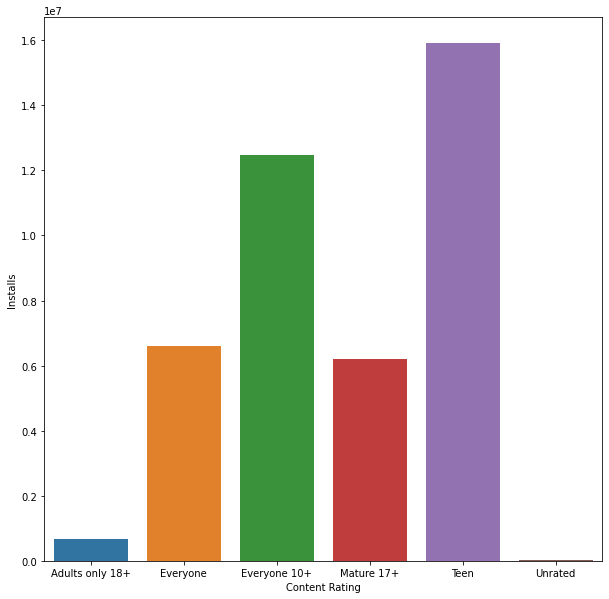

In [ ]:
#plot the barchart for visualization
fig,ax=plt.subplots(figsize=(10,10))
sns.barplot(y=con_ins,x=con_ins.index)


#### **13)What is Size distribution of apps?**

In [ ]:
#create two different dataset of fixed size app and variable sized app
app_size_num=df_ps[df_ps['Size']!='Varies with device']
app_size_num['Size']=app_size_num['Size'].apply(lambda x:float(x))
app_size_var=df_ps[df_ps['Size']=='Varies with device']

<ipython-input-96-ad6a8d01b983>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_size_num['Size']=app_size_num['Size'].apply(lambda x:float(x))


Text(0, 0.5, 'Size in MB')

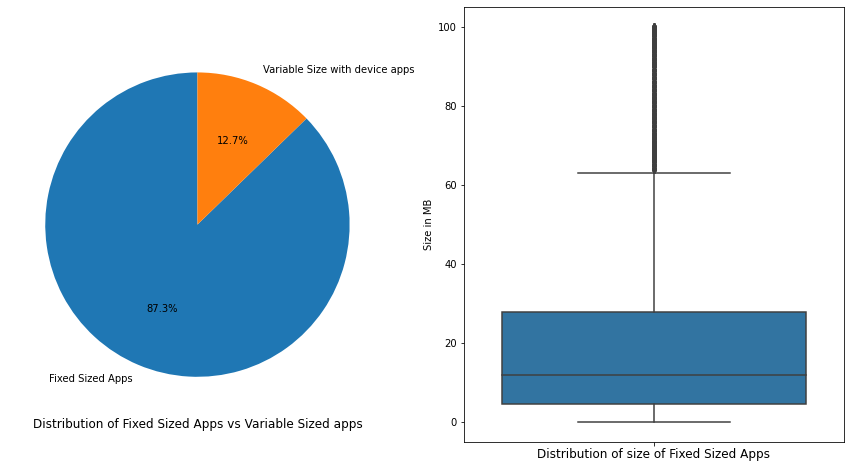

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
ax[0].pie([len(app_size_num),len(app_size_var)],labels=['Fixed Sized Apps','Variable Size with device apps'],autopct='%1.1f%%',startangle = 90)
ax[0].set_title('Distribution of Fixed Sized Apps vs Variable Sized apps',y=-0.05)
sns.boxplot(y=app_size_num.Size,ax=ax[1])
ax[1].set_title('Distribution of size of Fixed Sized Apps',y=-0.05)
ax[1].set_ylabel('Size in MB')

##### 1. Why did you pick the specific chart?

First we want to understand how many apps has fixed size and how many app size is variable with device with respect to total apps in playstore.So we choose the pie chart. After that What is the distribution of app size which have fixed app size

##### 2. What is/are the insight(s) found from the chart?

From piechart we can see that maximum app has fixed size and it is around 87.3% of total apps and few apps size are variable with device and it is around 12.7%.Apps which have fixed size have median size of 12MB and higher quartile and lower quartile lies between 28MB and 4.6MB.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

###**14)Does No of Installs depend on app size?**

In [ ]:
#create app_size group
def app_size_group(size):
  '''
  This function is create group of appsize between 0-100MB
  '''
  try:
    if size<1.0:
      return 'Below 1MB'
    elif size>=1.0 and size<5.0:
      return 'Below 5MB'
    elif size>=5.0 and size>15.0:
      return '5-15MB'
    elif size>=15.0 and size<30.0:
      return '15-30MB'
    elif size>=30.0 and size<60.0:
      return '30-60MB'
    elif size>=60.0 and size<100.0:
      return '60-100MB'
    else:
      return 'Above 100MB'
  except:
    return size 

In [ ]:
df_ps['appsize_category']=df_ps['Size'].apply(lambda x:app_size_group(x))
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group,appsize_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Top Rated,5-15MB
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Above Average,Above 100MB
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Top Rated,Above 100MB
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Top Rated,5-15MB
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Top Rated,Below 5MB


<AxesSubplot:xlabel='appsize_category', ylabel='Installs'>

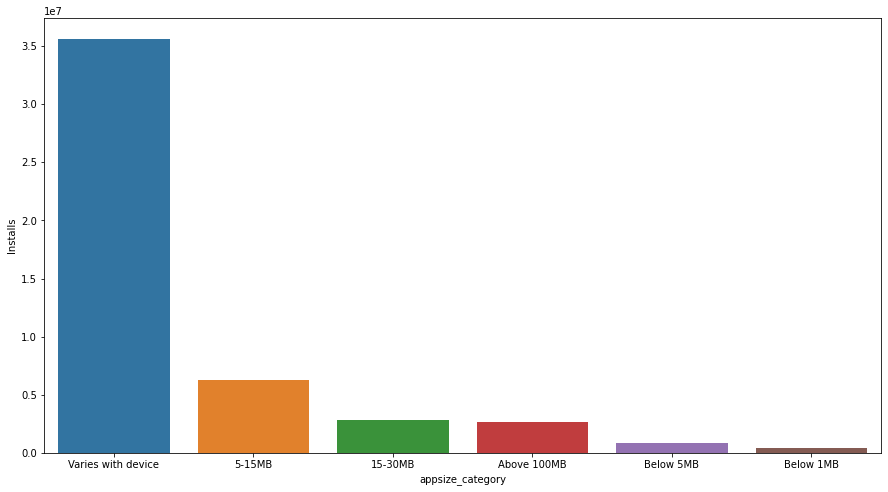

In [ ]:
# Chart - 13 visualization code most installed app size
appsize_cat_ins= df_ps.groupby(['appsize_category'])['Installs'].mean().sort_values(ascending=False)
appsize_cat_ins.fillna(0,inplace=True)
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x=appsize_cat_ins.index,y=appsize_cat_ins)


##### 1. Why did you pick the specific chart?

We want to find which appsize_category which have installed most and it is categorical data vs numerical data.So barchart is appropriate for this.   

##### 2. What is/are the insight(s) found from the chart?

Apps which size is varies with device has most no of installs,after that 5-15MB has more no of installs.Least no of installed app are below 1MB size

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Consumers prefers most the appsize of varies with device and appsize between 5 to 15 MB.Consumer prefer apps which size is below 1MB.

In [ ]:
app_size_num.describe()

,Rating,Reviews,Size,Installs,Price
count,8422.000000,8.422000e+03,8422.000000,8.422000e+03,8422.000000
mean,4.183876,1.207956e+05,20.413566,3.728447e+06,1.227016
std,0.513234,9.368919e+05,21.833476,2.484383e+07,18.039351
min,1.000000,0.000000e+00,0.010000,0.000000e+00,0.000000
25%,4.000000,1.700000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,4.785000e+02,12.000000,5.000000e+04,0.000000
75%,4.500000,1.567850e+04,28.000000,1.000000e+06,0.000000
max,5.000000,4.489172e+07,100.000000,1.000000e+09,400.000000


####**15)What are the most popular genre of the apps?**

In [ ]:
genre_app=df_ps['Genres'].value_counts()
genre_app

Tools                              824
Entertainment                      560
Education                          509
Business                           420
Medical                            395
                                  ... 
Art & Design;Pretend Play            1
Lifestyle;Pretend Play               1
Comics;Creativity                    1
Art & Design;Action & Adventure      1
Strategy;Creativity                  1
Name: Genres, Length: 118, dtype: int64

Text(0.5, 1.0, 'barchart of top 5 genres belongs to apps')

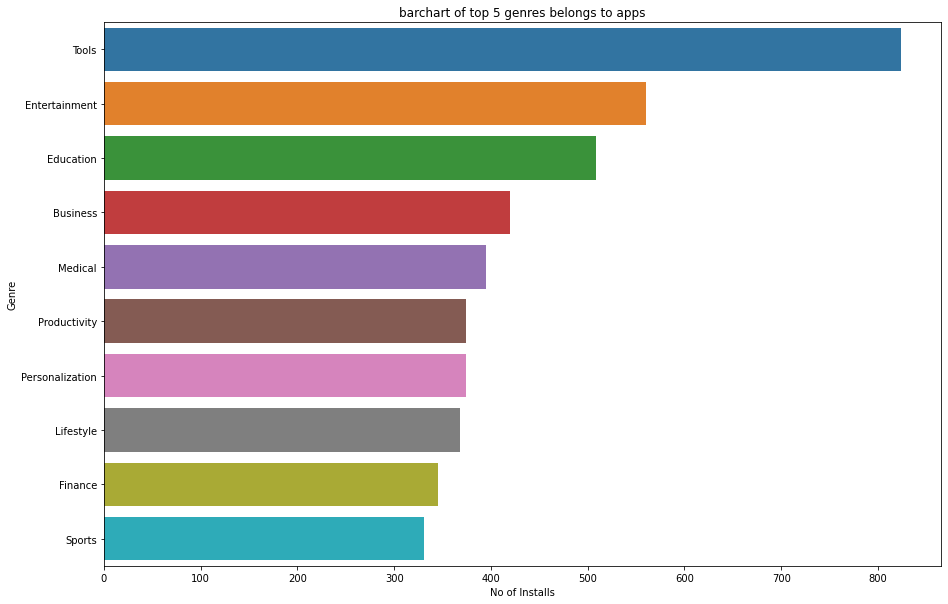

In [ ]:
g_a=genre_app[0:10]
plt.subplots(figsize=(15,10))
sns.barplot(x=g_a,y=g_a.index)
plt.ylabel('Genre')
plt.xlabel('No of Installs')
plt.title('barchart of top 5 genres belongs to apps')

#### **16)Does no of reviews has any impact on rating of the app?**

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

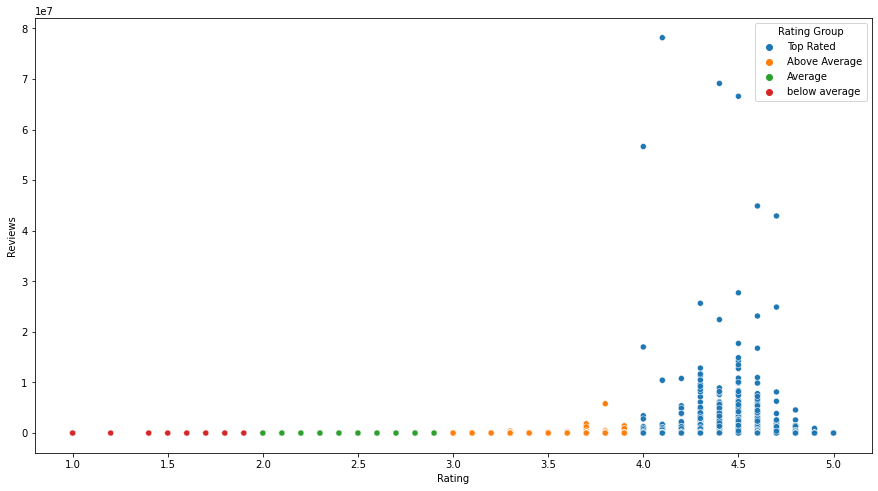

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.scatterplot(y='Reviews',x='Rating',data=df_ps,hue='Rating Group')

In [ ]:
rg_rev=df_ps.groupby(['Rating Group'])['Reviews'].sum()
rg_rev

Rating Group
Above Average      36603645
Average              251522
Top Rated        2055178972
below average          8574
Name: Reviews, dtype: int64

<AxesSubplot:xlabel='Rating Group', ylabel='Reviews'>

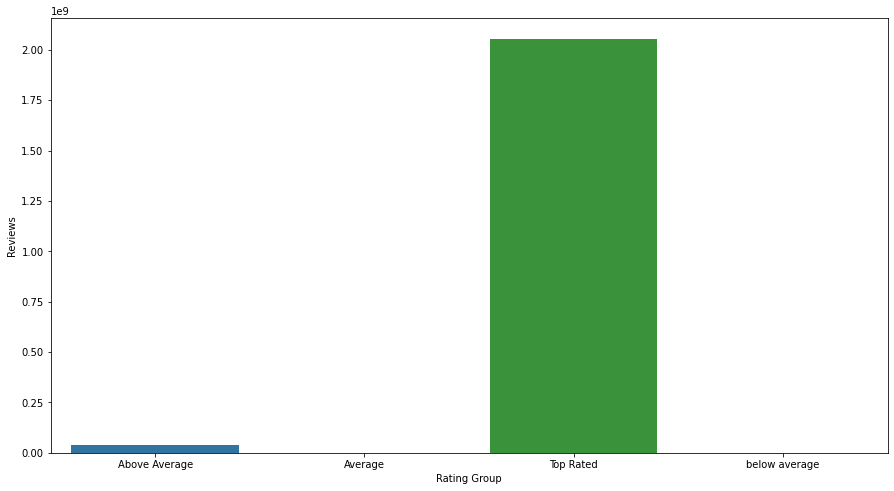

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x=rg_rev.index,y=rg_rev)

#### Number of Paid App vs Free App on each category.

#### **17)Does no of reviews has any impact on no of installation?**

<AxesSubplot:xlabel='Reviews', ylabel='Installs'>

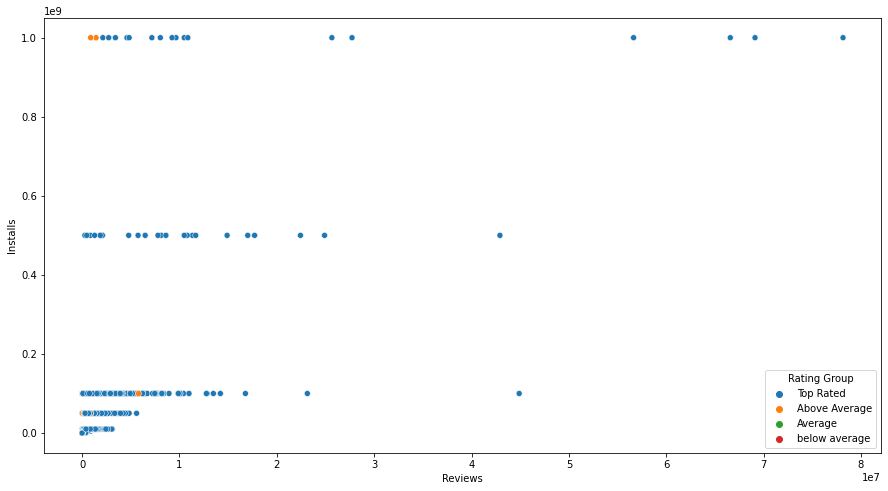

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.scatterplot(x='Reviews',y='Installs',data=df_ps,hue='Rating Group')

###**18)What is effect of Android version in no of installation?**

In [ ]:
def min_andr(version):
  if version=='Varies with device':
    return version
  else:
    min_ver=version[0]
  return min_ver

In [ ]:
df_ps['Minimum Android Version']=df_ps['Android Ver'].apply(lambda x:min_andr(x))
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group,appsize_category,Minimum Android Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Top Rated,5-15MB,4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Above Average,Above 100MB,4
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Top Rated,Above 100MB,4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Top Rated,5-15MB,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Top Rated,Below 5MB,4


In [ ]:
and_ins=df_ps.groupby(['Minimum Android Version'])['Installs'].sum()
and_ins

Minimum Android Version
1                        69315262
2                      2782474476
3                       480951871
4                     30681045821
5                      1648238108
6                        52646391
7                       325559600
8                         1510106
Varies with device    39079618782
Name: Installs, dtype: int64

<AxesSubplot:xlabel='Minimum Android Version', ylabel='Installs'>

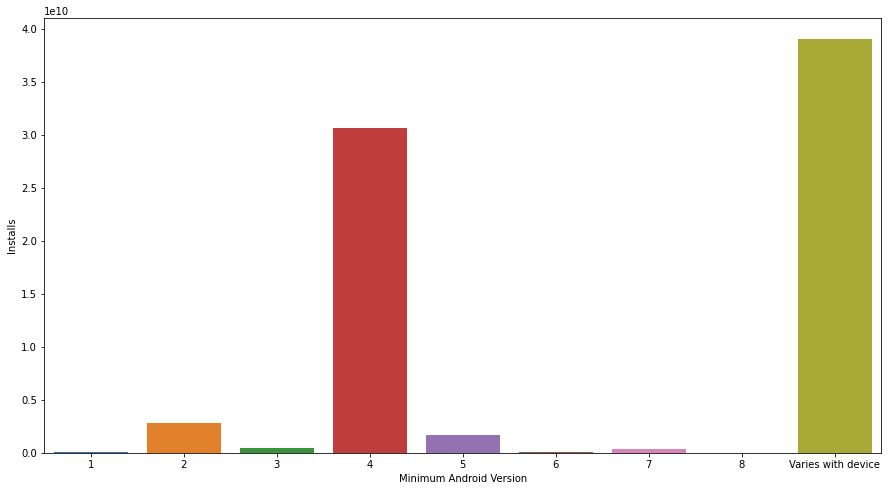

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x=and_ins.index,y=and_ins)

###**19)Does Last Update date has an effects on rating?**

In [ ]:
df_ps["Update year"] = df_ps["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group,appsize_category,Minimum Android Version,Update year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Top Rated,5-15MB,4,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Above Average,Above 100MB,4,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Top Rated,Above 100MB,4,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Top Rated,5-15MB,4,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Top Rated,Below 5MB,4,2018


<AxesSubplot:xlabel='Update year', ylabel='Rating'>

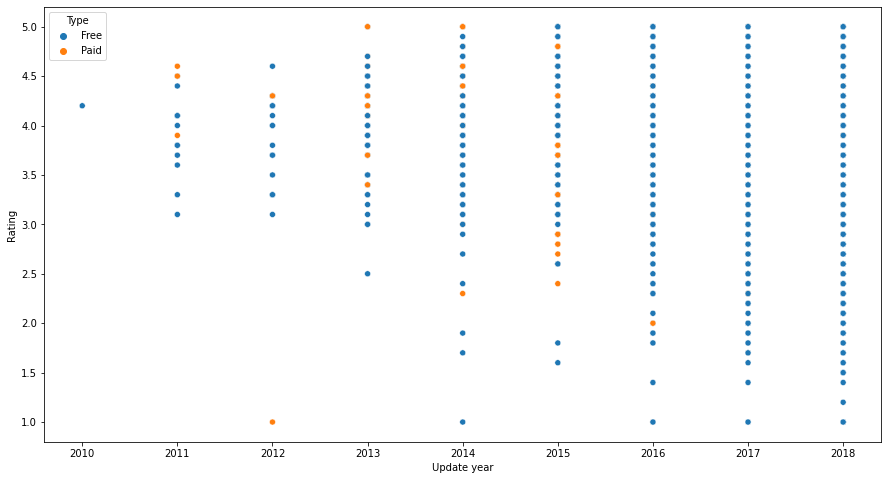

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.scatterplot(x='Update year',y='Rating',data=df_ps,hue='Type')

### **20)What is the sentiment distribution of the apps?**

In [ ]:
df_ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


([<matplotlib.patches.Wedge at 0x7fab68b3b430>,
 [Text(-0.9935446176567857, -0.47209013199306743, 'Positive'),
  Text(1.0999379873316804, 0.011680069551688444, 'Negative'),
  Text(0.4615137708810173, 0.9985013967377232, 'Neutral')],
 [Text(-0.5419334278127921, -0.2575037083598549, '64.1%'),
  Text(0.5999661749081893, 0.006370947028193697, '22.1%'),
  Text(0.2517347841169185, 0.5446371254933035, '13.8%')])

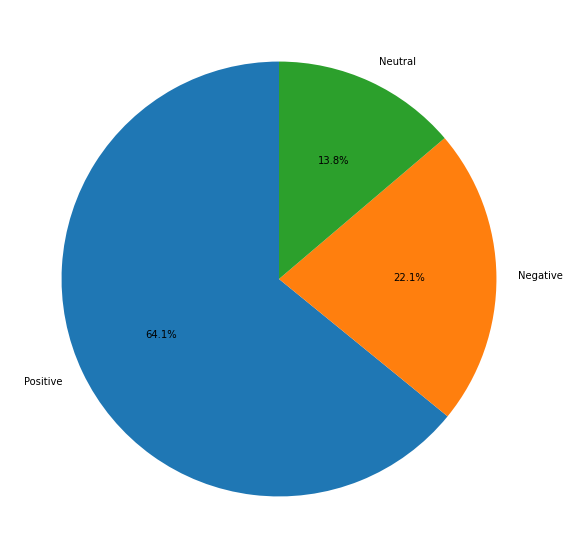

In [ ]:
senti=df_ur['Sentiment'].value_counts()
fig,ax=plt.subplots(figsize=(10,10))
ax.pie(x=senti,labels=senti.index,autopct='%1.1f%%',startangle=90)

###**21)Find out top 5 positive reviewed app and top 5 negative reviewd app.**


In [ ]:
pos=df_ur[df_ur['Sentiment']=='Positive']
pos.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


Text(0.5, 1.0, 'Top 10 positive review apps')

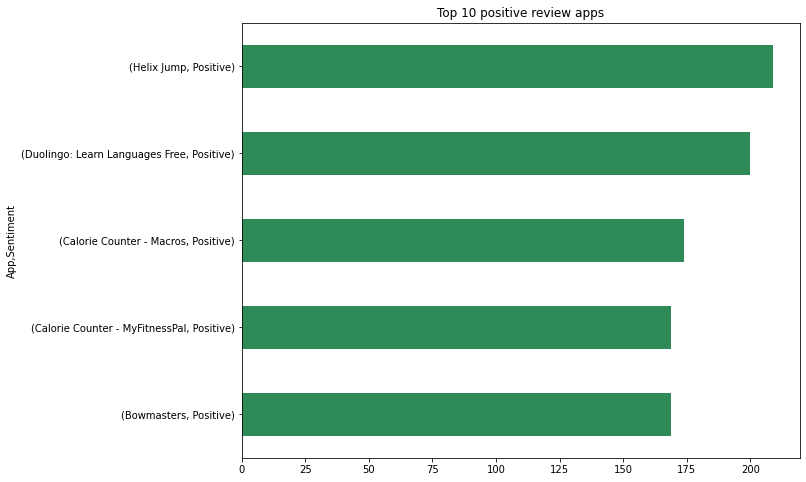

In [ ]:
pos_gr=pos.groupby('App')['Sentiment'].value_counts().sort_values(ascending=False)[0:5].plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 5 positive review apps")


In [ ]:
neg=df_ur[df_ur['Sentiment']=='Negative']
neg.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500,0.500
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200,0.000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200,0.000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800,0.800
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325,0.475


Text(0.5, 1.0, 'Top 5 negative review apps')

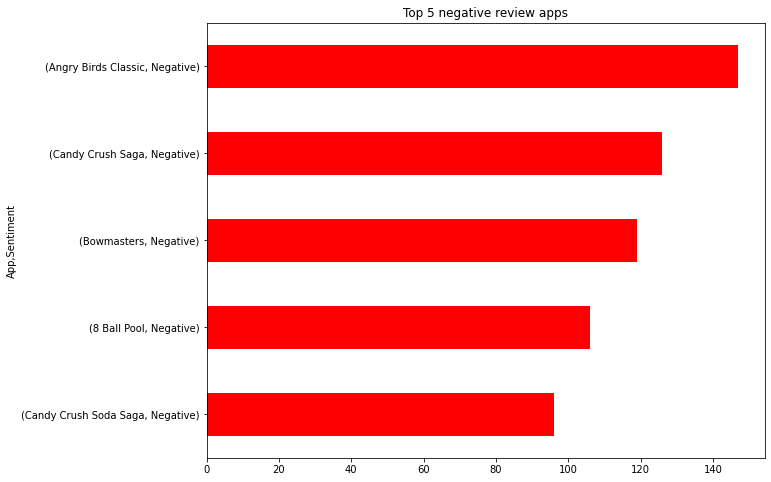

In [ ]:
neg_gr=neg.groupby('App')['Sentiment'].value_counts().sort_values(ascending=False)[0:5].plot.barh(figsize=(10,8),color='red').invert_yaxis()
plt.title("Top 5 negative review apps")

###**22)What is the distribution of the sentiment polarity?**

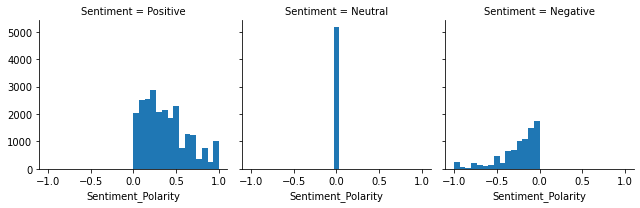

In [ ]:

graph = sns.FacetGrid(df_ur, col ='Sentiment')
graph.map(plt.hist,'Sentiment_Polarity',bins=15)

###**23)What is relation between sentiment polarity and sentiment subjectivity?**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment_Subjectivity', ylabel='Sentiment_Polarity'>

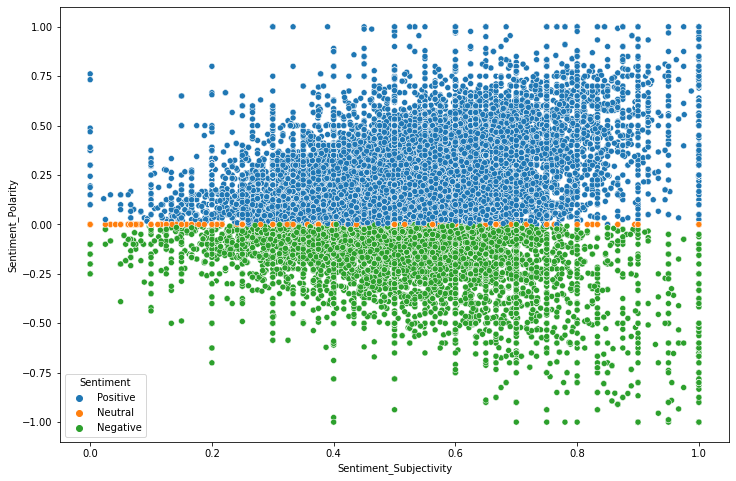

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
sns.scatterplot(df_ur['Sentiment_Subjectivity'], df_ur['Sentiment_Polarity'],
                hue = df_ur['Sentiment'])

###**24)What is correlation between the variables of the apps??**

In [ ]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


Text(0.5, 1.0, ' Heatmap for merged Dataframe')

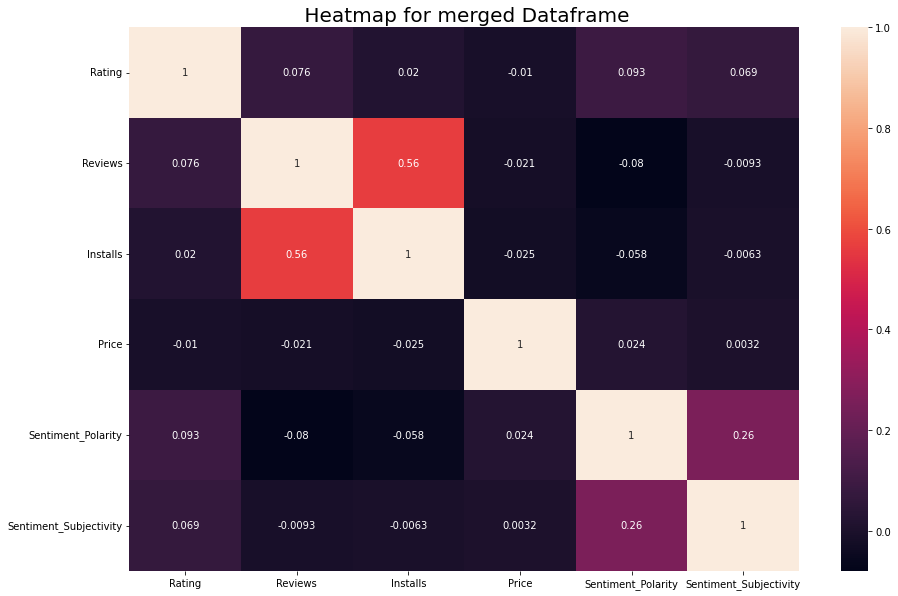

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(merged_df.corr(), annot= True)
plt.title(' Heatmap for merged Dataframe', size=20)

###**25)Draw the pairplot chart of variables of the dataframe.**

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

<Figure size 720x720 with 0 Axes>

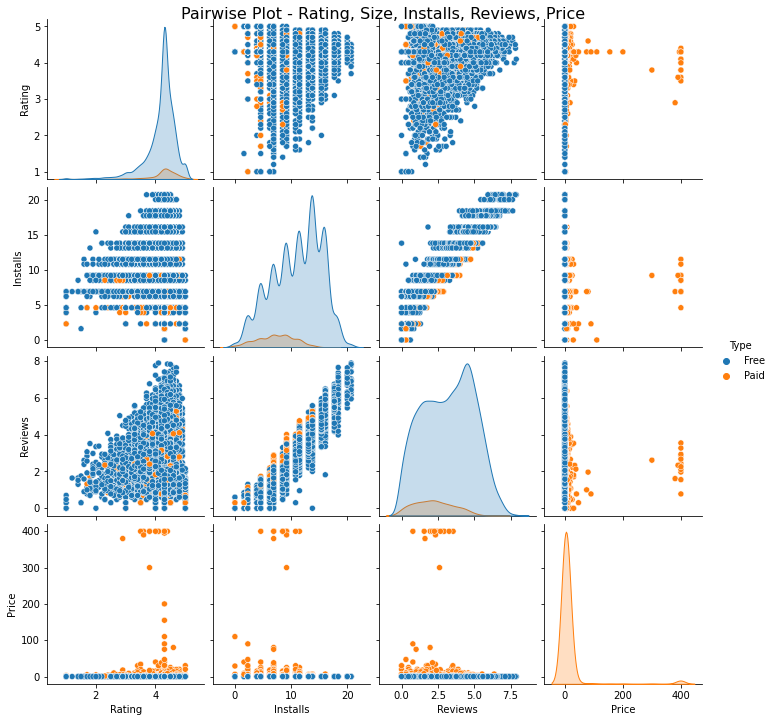

In [ ]:
Rating = df_ps['Rating']
Size = df_ps['Size']
Installs = df_ps['Installs']
Reviews = df_ps['Reviews']
Type = df_ps['Type']
Price = df_ps['Price']
plt.figure(figsize=(10,10))
p = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)

[Text(0, 0, 'Google Street View'),
 Text(1, 0, 'Messenger – Text and Video Chat for Free'),
 Text(2, 0, 'Google Drive'),
 Text(3, 0, 'Google'),
 Text(4, 0, 'Skype - free IM & video calls'),
 Text(5, 0, 'Facebook'),
 Text(6, 0, 'Instagram'),
 Text(7, 0, 'Google News'),
 Text(8, 0, 'Google+'),
 Text(9, 0, 'Maps - Navigate & Explore')]

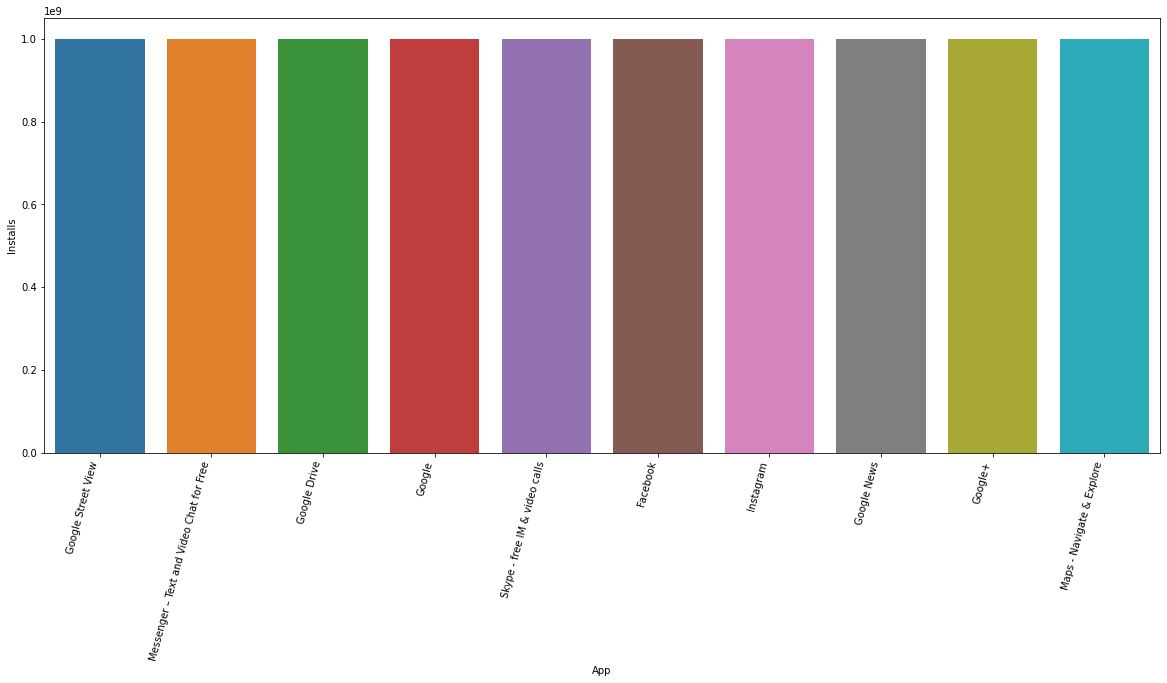

In [ ]:
app_type=df_ps[['App','Installs','Type']]
free_app=app_type[app_type['Type']=='Free'].sort_values(by='Installs',ascending=False).head(10)
fig,ax=plt.subplots(figsize=(20,8))
at_visuals=sns.barplot(x=free_app.App,y=free_app.Installs)
at_visuals.set_xticklabels(at_visuals.get_xticklabels(), rotation= 75, horizontalalignment='right')

##### 1. Why did you pick the specific chart?

we want to know the highest installed apps in playstore which is free.Here it goes categorical data vs numerical value,bar chart is ideal for this

##### 2. What is/are the insight(s) found from the chart?

Top 10 free installed apps are Google Street View, Messenger – Text and Video Chat for Free, Google Drive, Google, Skype - free IM & video calls, Facebook, 'Instagram, Google News, Google+, Maps - Navigate & Explore

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


###Top 10 Paid Apps

[Text(0, 0, 'Hitman Sniper'),
 Text(1, 0, 'Minecraft'),
 Text(2, 0, 'Bloons TD 5'),
 Text(3, 0, 'Facetune - For Free'),
 Text(4, 0, 'Grand Theft Auto: San Andreas'),
 Text(5, 0, 'Infinity Dungeon VIP'),
 Text(6, 0, 'Card Wars - Adventure Time'),
 Text(7, 0, 'Zombie Avengers:(Dreamsky)Stickman War Z'),
 Text(8, 0, 'Stickman Legends: Shadow Wars'),
 Text(9, 0, 'League of Stickman 2018- Ninja Arena PVP(Dreamsky)')]

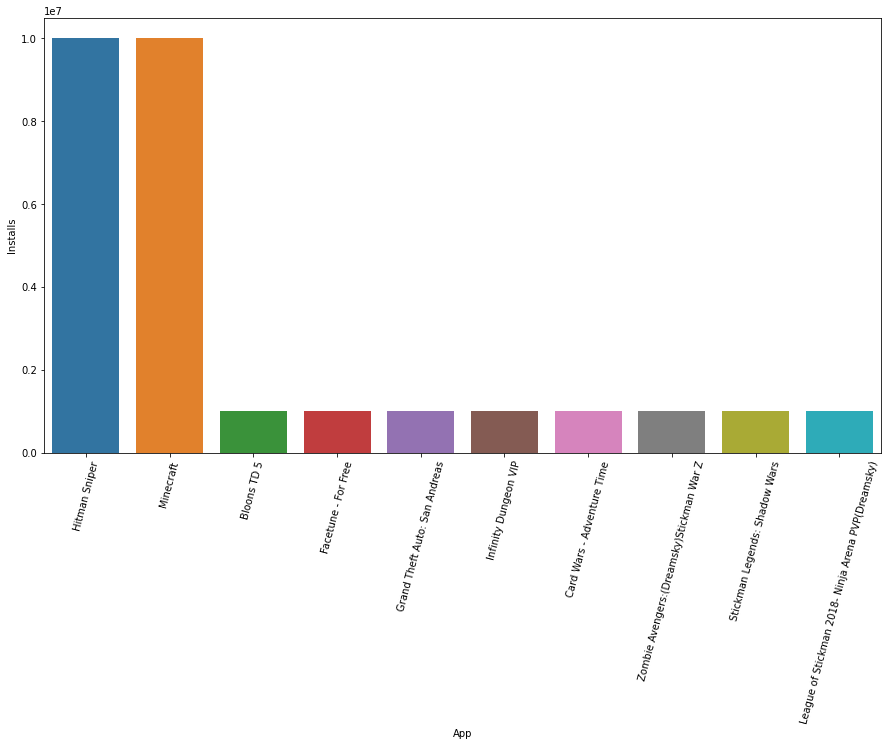

In [ ]:
app_type=df_ps[['App','Installs','Type']]
paid_app=app_type[app_type['Type']=='Paid'].sort_values(by='Installs',ascending=False).head(10)
fig,ax=plt.subplots(figsize=(15,8))
app_type_visuals=sns.barplot(x=paid_app.App,y=paid_app.Installs)
app_type_visuals.set_xticklabels(app_type_visuals.get_xticklabels(),rotation=75)

Top 10 paid apps are Hitman Sniper,Minecraft,Bloons TD 5,Facetune-for free,Grand Theft Auto:San Andreas,Infinity Dungeon VIP,Card Wars-Adventure Time,Zombie Avengers(Dreamsky) stickman warZ,stickman Legends:Shadow Wars,League of stickman 2018-Ninja arena PVP(Dreamsky)

#### Top 10 app in each category

In [ ]:
# Chart - 9 visualization code
def cat_top10(category):
  '''
  Plot  top 10 installed app of given category
  '''
  df_top=df_ps[df_ps['Category']==category]
  data=df_top[['App','Installs']].sort_values('Installs',ascending=False).head(10)
  fig,ax=plt.subplots(figsize=(20,10))
  ax.set_title('Top 10 installed App ')
  visuals=sns.barplot(x=data.App,y=data.Installs,palette='husl')
  visuals.set_xticklabels(visuals.get_xticklabels(), rotation= 75, horizontalalignment='right')

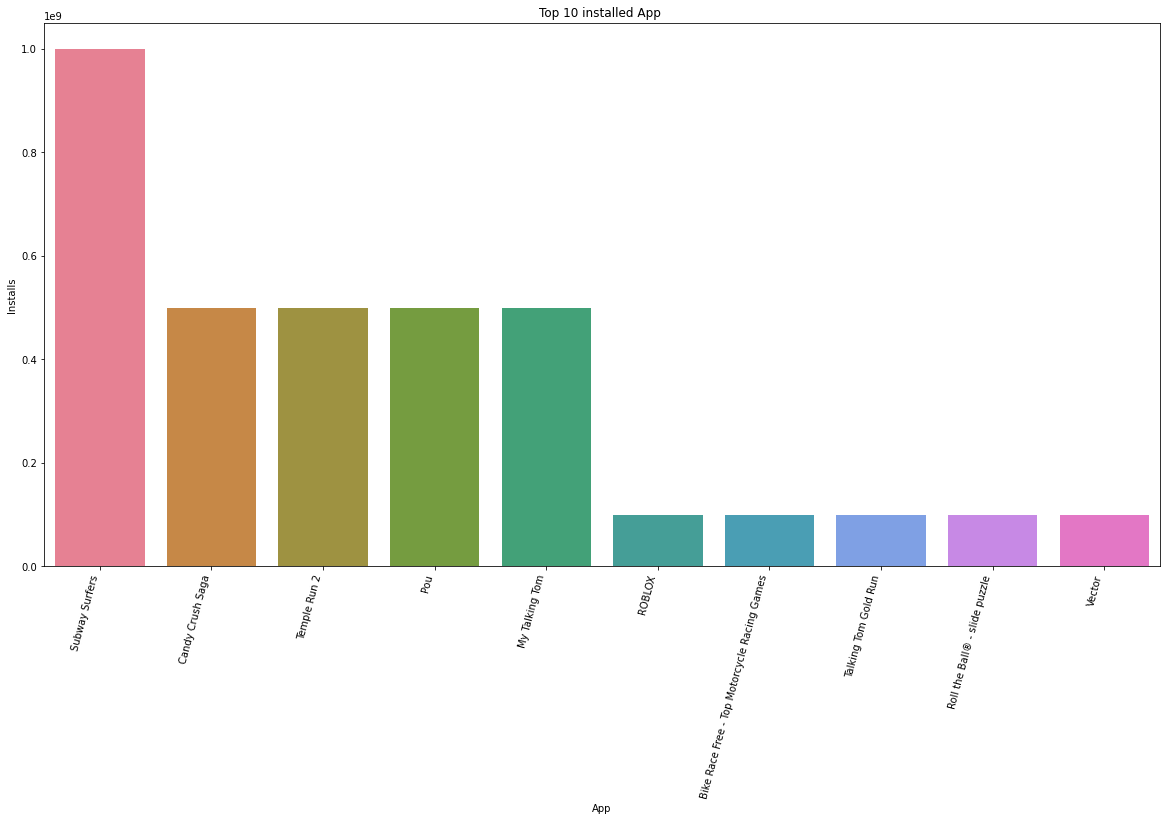

In [ ]:
cat_top10('GAME')

##### 1. Why did you pick the specific chart?

We want to find the top 10 installed app in specified category.So it is visualisation of categorical value and numerical value.So barchart is appropriate for this.

##### 2. What is/are the insight(s) found from the chart?

Here we find 10 installed app in specified category.For example we take game category and find out subway suffers is most installed game app.Others 9 are candy crush saga,tempke run2,pou,my talking tom,roblox,bike race free,talking tom gold run,roll the balls,vector

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

if we have predetermined category of the app its good to know the top apps whom we should compete.

#### Top 10 Rated App(minimum median of installs of apps)

#### Chart - 11

#### Chart - 12

#### Chart - 13

###Category vs Review Analysis

<AxesSubplot:xlabel='Reviews', ylabel='Category'>

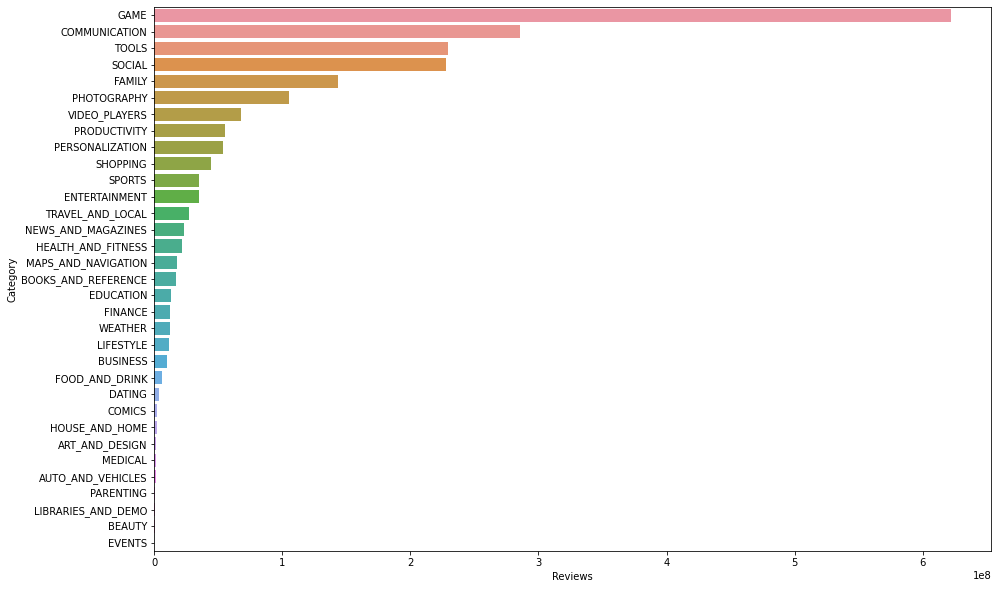

In [ ]:
#find the wich category app has review

cat_rev=df_ps.groupby(['Category'])['Reviews'].sum().sort_values(ascending=False)
plt.subplots(figsize=(15,10))
sns.barplot(x=cat_rev,y=cat_rev.index)

##### 1. Why did you pick the specific chart?

For analysis of app category and no of reviews,app category is categorical value and no of reviews is numerical data.Horizontal barchart is also ideal for that.

##### 2. What is/are the insight(s) found from the chart?

The graph shows that social category,communication,game category has most reviews.Beuty,Medical,Events category has least reviews.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

People love to give reviews or feedback of social communication and game category apps and adamant to give reviews of beuty,Medical,Events category app.

###

In [ ]:
df_ps['Minimum Android Version']=df_ps['Android Ver'].apply(lambda x:min_andr(x))
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group,appsize_category,Minimum Android Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Top Rated,5-15MB,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Above Average,Above 100MB,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Top Rated,Above 100MB,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Top Rated,5-15MB,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Top Rated,Below 5MB,4.0


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***